### AIML Capstone Project - CV- Car Detection

#### DOMAIN: Automotive Surveillance
#### • CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.
#### • DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
Data description:
‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
#### Dataset has been attached along with this project. Please use the same for this capstone project.
Dataset: https://drive.google.com/drive/folders/1y6JWx2CpsOuka00uePe72jNgr7F9sK45?usp=sharing
Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
##### • PROJECT OBJECTIVE: Design a DL based car identification model.

#### PROJECT TASK:  [ Duration: 6 weeks, Score: 100 points]
#### 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 
#### ‣ Process:
#### ‣ Step 1: Import the data
#### ‣ Step 2: Map training and testing images to its classes.
#### ‣ Step 3: Map training and testing images to its annotations. ‣ Step 4: Display images with bounding box
#### ‣ Output: Images mapped to its class and annotation ready to be used for deep learning


In [2]:
from google.colab import drive
drive.mount("/content.gdrive")

Mounted at /content.gdrive


In [1]:
# Initialize the random number generator
import random
random.seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
%matplotlib inline
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Model,load_model
from sklearn import preprocessing
from tensorflow.keras.layers import Input,InputLayer,Dense, Dropout, BatchNormalization,Flatten,Activation,Conv2D,MaxPool2D,GlobalMaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, r2_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

# used to supress display of warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [4]:
%tensorflow_version 2.x

In [2]:
tf.__version__

'2.6.0'

In [6]:
project_path='/content.gdrive/MyDrive'
path = os.getcwd()
print(path)
#Changing the directory
os.chdir(project_path)
print(os.getcwd())

/content
/content.gdrive/MyDrive


In [226]:
path = os.getcwd()
print(path)

/Users/Z005BWR/Downloads/GL


In [236]:
pathToTrainData ='Dataset/Car Images/Train Images'

In [7]:
#Importing the training data set
cars_train_data = pd.DataFrame(columns=['imageName','imagePath','class','height','width'])

for dirname, _, filenames in os.walk(pathToTrainData):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        img_name = os.path.split(path)[1]
          
        if img_name!='.DS_Store':
          img = cv2.imread(path)
          height, width, channel = img.shape
          class_label = dirname.split('/')[-1]
          cars_train_data = cars_train_data.append({'imageName':img_name,'imagePath':path , 'class':class_label,'height':height,'width':width}, ignore_index = True)

In [8]:
cars_train_data.to_csv(r'Dataset/cars_train_data.csv', index=False)
cars_train_data

imageName                                          imagePath  \
0     06796.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
1     04157.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
2     00682.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
3     07660.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
4     00483.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
...         ...                                                ...   
8139  03541.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8140  07479.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8141  07876.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8142  07484.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8143  03185.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   

                            class height width  
0      Dodge Dakota Crew Cab 2010    312   416  
1      Dodge Dakota Crew Cab 2010    194   259  
2      Dodge Dakota Crew Cab 2010    240   320  
3      Dodge Dakota Crew Cab 2010    768  1024  
4      Dodge Dakota Crew Cab 2010    360   640  
...                           ...    ...   ...  
8139  Chevrolet Corvette ZR1 2012    334   500  
8140  Chevrolet Corvette ZR1 2012    480   640  
8141  Chevrolet Corvette ZR1 2012    183   300  
8142  Chevrolet Corvette ZR1 2012    183   276  
8143  Chevrolet Corvette ZR1 2012   3240  4320  

[8144 rows x 5 columns]

In [4]:
cars_train_data = pd.read_csv('Dataset/cars_train_data.csv')

In [5]:
#Removing parent directory, if any
cars_train_data = cars_train_data[cars_train_data['class'] != 'Train Images']

In [6]:
cars_train_data

imageName                                          imagePath  \
0     06796.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
1     04157.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
2     00682.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
3     07660.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
4     00483.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
...         ...                                                ...   
8139  03541.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8140  07479.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8141  07876.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8142  07484.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   
8143  03185.jpg  Dataset/Car Images/Train Images/Chevrolet Corv...   

                            class  height  width  
0      Dodge Dakota Crew Cab 2010     312    416  
1      Dodge Dakota Crew Cab 2010     194    259  
2      Dodge Dakota Crew Cab 2010     240    320  
3      Dodge Dakota Crew Cab 2010     768   1024  
4      Dodge Dakota Crew Cab 2010     360    640  
...                           ...     ...    ...  
8139  Chevrolet Corvette ZR1 2012     334    500  
8140  Chevrolet Corvette ZR1 2012     480    640  
8141  Chevrolet Corvette ZR1 2012     183    300  
8142  Chevrolet Corvette ZR1 2012     183    276  
8143  Chevrolet Corvette ZR1 2012    3240   4320  

[8144 rows x 5 columns]

In [7]:
cars_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 8143
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  8144 non-null   object
 1   imagePath  8144 non-null   object
 2   class      8144 non-null   object
 3   height     8144 non-null   int64 
 4   width      8144 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 381.8+ KB


Visualizing Training images

In [8]:
image_1 = cars_train_data.iloc[0,:].imagePath
image_1

'Dataset/Car Images/Train Images/Dodge Dakota Crew Cab 2010/06796.jpg'

In [9]:
#Function to Visualize the images
def load_car_image(path):
    img = cv2.imread(path)
    print(img.shape)
    # OpenCV loads images with color channels in BGR order. So we need to reverse them
    return img[...,::-1]

(312, 416, 3)


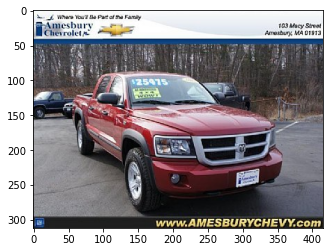

In [10]:
plt.imshow(load_car_image(image_1))

In [11]:
#Let us check its corresponding class
cars_train_data.iloc[0,:]['class']

'Dodge Dakota Crew Cab 2010'

(194, 259, 3)


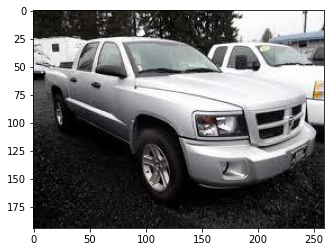

In [12]:
plt.imshow(load_car_image(cars_train_data.iloc[1,:].imagePath))

In [13]:
#Let us check its corresponding class
cars_train_data.iloc[1,:]['class']

'Dodge Dakota Crew Cab 2010'

(480, 640, 3)


'GMC Savana Van 2012'

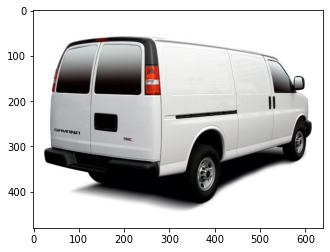

In [14]:
plt.imshow(load_car_image(cars_train_data.iloc[8000,:].imagePath))
cars_train_data.iloc[8000,:]['class']

Total classes in Training Data set

In [15]:
cars_train_data['class'].value_counts()

GMC Savana Van 2012                                    68
Chrysler 300 SRT-8 2010                                49
Mercedes-Benz 300-Class Convertible 1993               48
Mitsubishi Lancer Sedan 2012                           48
Chevrolet Corvette ZR1 2012                            47
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24
Name: class, Length: 196, dtype: int64

In [16]:
unique, counts = np.unique(cars_train_data['class'], return_counts=True)
unique, counts

(array(['AM General Hummer SUV 2000', 'Acura Integra Type R 2001',
        'Acura RL Sedan 2012', 'Acura TL Sedan 2012',
        'Acura TL Type-S 2008', 'Acura TSX Sedan 2012',
        'Acura ZDX Hatchback 2012',
        'Aston Martin V8 Vantage Convertible 2012',
        'Aston Martin V8 Vantage Coupe 2012',
        'Aston Martin Virage Convertible 2012',
        'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994',
        'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012',
        'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007',
        'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012',
        'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011',
        'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012',
        'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994',
        'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
        'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
        'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012',
        'BMW M3

We can see that training images has 8144 images. and has 196 classes.
Let us create the testing data set now.

In [237]:
pathToTestData ='Dataset/Car Images/Test Images'

In [23]:
#Importing the testing data set
cars_test_data = pd.DataFrame(columns=['imageName','imagePath','class','height','width'])

for dirname, _, filenames in os.walk(pathToTestData):
     for filename in filenames:
        path = os.path.join(dirname, filename)
        img_name = os.path.split(path)[1]
          
        if img_name!='.DS_Store':
          img = cv2.imread(path)
          height, width, channel = img.shape
          class_label = dirname.split('/')[-1]
          cars_test_data = cars_test_data.append({'imageName':img_name,'imagePath':path , 'class':class_label,'height':height,'width':width}, ignore_index = True)
       

In [24]:
cars_test_data = cars_test_data[cars_test_data['class'] != 'Test Images']

In [25]:
cars_test_data.to_csv(r'Dataset/cars_test_data.csv', index=False)
cars_test_data

imageName                                          imagePath  \
0     00318.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
1     03773.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
2     01206.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
3     08018.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
4     05448.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
...         ...                                                ...   
8036  07450.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8037  07518.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8038  02893.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8039  06161.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8040  07109.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   

                            class height width  
0      Dodge Dakota Crew Cab 2010    360   480  
1      Dodge Dakota Crew Cab 2010    194   259  
2      Dodge Dakota Crew Cab 2010    225   300  
3      Dodge Dakota Crew Cab 2010    768  1024  
4      Dodge Dakota Crew Cab 2010    225   300  
...                           ...    ...   ...  
8036  Chevrolet Corvette ZR1 2012    221   300  
8037  Chevrolet Corvette ZR1 2012    194   259  
8038  Chevrolet Corvette ZR1 2012    492   786  
8039  Chevrolet Corvette ZR1 2012    194   259  
8040  Chevrolet Corvette ZR1 2012    853  1280  

[8041 rows x 5 columns]

In [17]:
cars_test_data = pd.read_csv('Dataset/cars_test_data.csv')
cars_test_data

imageName                                          imagePath  \
0     00318.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
1     03773.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
2     01206.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
3     08018.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
4     05448.jpg  Dataset/Car Images/Test Images/Dodge Dakota Cr...   
...         ...                                                ...   
8036  07450.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8037  07518.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8038  02893.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8039  06161.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   
8040  07109.jpg  Dataset/Car Images/Test Images/Chevrolet Corve...   

                            class  height  width  
0      Dodge Dakota Crew Cab 2010     360    480  
1      Dodge Dakota Crew Cab 2010     194    259  
2      Dodge Dakota Crew Cab 2010     225    300  
3      Dodge Dakota Crew Cab 2010     768   1024  
4      Dodge Dakota Crew Cab 2010     225    300  
...                           ...     ...    ...  
8036  Chevrolet Corvette ZR1 2012     221    300  
8037  Chevrolet Corvette ZR1 2012     194    259  
8038  Chevrolet Corvette ZR1 2012     492    786  
8039  Chevrolet Corvette ZR1 2012     194    259  
8040  Chevrolet Corvette ZR1 2012     853   1280  

[8041 rows x 5 columns]

We can see that testing images has 8041 images.

We will sort, test and train images by image name.



In [18]:
cars_train_data.sort_values(['imageName'],axis=0,ascending=[True],inplace=True)

cars_test_data.sort_values(['imageName'],axis=0,ascending=[True],inplace=True)

In [19]:
#Renaming imageName to match to Annotations Data Set
cars_train_data.rename(columns = {'imageName': 'Image Name'},inplace = True)
cars_test_data.rename(columns = {'imageName': 'Image Name'},inplace = True)

In [20]:
cars_train_data

Image Name                                          imagePath  \
4114  00001.jpg  Dataset/Car Images/Train Images/Audi TTS Coupe...   
6607  00002.jpg  Dataset/Car Images/Train Images/Acura TL Sedan...   
1760  00003.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
1596  00004.jpg  Dataset/Car Images/Train Images/Hyundai Sonata...   
6564  00005.jpg  Dataset/Car Images/Train Images/Ford F-450 Sup...   
...         ...                                                ...   
2973  08140.jpg  Dataset/Car Images/Train Images/Chrysler Town ...   
5781  08141.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
6804  08142.jpg  Dataset/Car Images/Train Images/Mercedes-Benz ...   
6239  08143.jpg  Dataset/Car Images/Train Images/Ford GT Coupe ...   
2150  08144.jpg  Dataset/Car Images/Train Images/Audi 100 Sedan...   

                                       class  height  width  
4114                     Audi TTS Coupe 2012     400    600  
6607                     Acura TL Sedan 2012     675    900  
1760              Dodge Dakota Club Cab 2007     480    640  
1596        Hyundai Sonata Hybrid Sedan 2012    1386   2100  
6564     Ford F-450 Super Duty Crew Cab 2012     108    144  
...                                      ...     ...    ...  
2973  Chrysler Town and Country Minivan 2012     360    424  
5781           smart fortwo Convertible 2012     600    800  
6804       Mercedes-Benz SL-Class Coupe 2009     469    750  
6239                      Ford GT Coupe 2006    1067   1600  
2150                     Audi 100 Sedan 1994     683    883  

[8144 rows x 5 columns]

In [21]:
cars_test_data

Image Name                                          imagePath  \
4541  00001.jpg  Dataset/Car Images/Test Images/Suzuki Aerio Se...   
3232  00002.jpg  Dataset/Car Images/Test Images/Ferrari 458 Ita...   
5276  00003.jpg  Dataset/Car Images/Test Images/Jeep Patriot SU...   
2521  00004.jpg  Dataset/Car Images/Test Images/Toyota Camry Se...   
7832  00005.jpg  Dataset/Car Images/Test Images/Tesla Model S S...   
...         ...                                                ...   
4350  08037.jpg  Dataset/Car Images/Test Images/Chevrolet Sonic...   
3123  08038.jpg  Dataset/Car Images/Test Images/Audi V8 Sedan 1...   
2145  08039.jpg  Dataset/Car Images/Test Images/Audi 100 Sedan ...   
3953  08040.jpg  Dataset/Car Images/Test Images/BMW Z4 Converti...   
1154  08041.jpg  Dataset/Car Images/Test Images/BMW X5 SUV 2007...   

                                    class  height  width  
4541              Suzuki Aerio Sedan 2007     182    276  
3232  Ferrari 458 Italia Convertible 2012     360    640  
5276                Jeep Patriot SUV 2012     741   1024  
2521              Toyota Camry Sedan 2012     480    640  
7832             Tesla Model S Sedan 2012     373    600  
...                                   ...     ...    ...  
4350           Chevrolet Sonic Sedan 2012     800   1200  
3123                   Audi V8 Sedan 1994     480    640  
2145                  Audi 100 Sedan 1994     303    635  
3953              BMW Z4 Convertible 2012     427    640  
1154                      BMW X5 SUV 2007     426    640  

[8041 rows x 5 columns]

Let us load the annotations now.

In [22]:
#Loading Training Annotations
pathToAnotations ='Dataset/Annotations'
cars_train_annotations = pd.read_csv(pathToAnotations+'/Train Annotations.csv')

In [23]:
cars_train_annotations

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        39         116         569         375   
1     00002.jpg                        36         116         868         587   
2     00003.jpg                        85         109         601         381   
3     00004.jpg                       621         393        1484        1096   
4     00005.jpg                        14          36         133          99   
...         ...                       ...         ...         ...         ...   
8139  08140.jpg                         3          44         423         336   
8140  08141.jpg                       138         150         706         523   
8141  08142.jpg                        26         246         660         449   
8142  08143.jpg                        78         526        1489         908   
8143  08144.jpg                        20         240         862         677   

      Image class  
0              14  
1               3  
2              91  
3             134  
4             106  
...           ...  
8139           78  
8140          196  
8141          163  
8142          112  
8143           17  

[8144 rows x 6 columns]

We can see that the training annotations have bounding box coordinates of all the 8144 images.

In [24]:
#Loading Testing Annotations
pathToAnotations ='Dataset/Annotations'
cars_test_annotations = pd.read_csv(pathToAnotations+'/Test Annotation.csv')

In [25]:
cars_test_annotations

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        30          52         246         147   
1     00002.jpg                       100          19         576         203   
2     00003.jpg                        51         105         968         659   
3     00004.jpg                        67          84         581         407   
4     00005.jpg                       140         151         593         339   
...         ...                       ...         ...         ...         ...   
8036  08037.jpg                        49          57        1169         669   
8037  08038.jpg                        23          18         640         459   
8038  08039.jpg                        33          27         602         252   
8039  08040.jpg                        33         142         521         376   
8040  08041.jpg                        77          73         506         380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 6 columns]

We can see that the testing annotations have bounding box coordinates of all the 8041 images.

We can see that the annotations dataset has Unamed columns for bounding box coordinates, let us assume it is in the sequence of x1,x2,y1 and y2 and visualize one image to verify it.

Mapping Train and Test images to its annotations and classes now.

In [26]:
car_train_image_details = pd.merge(cars_train_data, cars_train_annotations, 
                   on='Image Name', 
                   how='outer')

In [27]:
car_train_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Train Images/Audi TTS Coupe...   
1     00002.jpg  Dataset/Car Images/Train Images/Acura TL Sedan...   
2     00003.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
3     00004.jpg  Dataset/Car Images/Train Images/Hyundai Sonata...   
4     00005.jpg  Dataset/Car Images/Train Images/Ford F-450 Sup...   
...         ...                                                ...   
8139  08140.jpg  Dataset/Car Images/Train Images/Chrysler Town ...   
8140  08141.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8141  08142.jpg  Dataset/Car Images/Train Images/Mercedes-Benz ...   
8142  08143.jpg  Dataset/Car Images/Train Images/Ford GT Coupe ...   
8143  08144.jpg  Dataset/Car Images/Train Images/Audi 100 Sedan...   

                                       class  height  width  \
0                        Audi TTS Coupe 2012     400    600   
1                        Acura TL Sedan 2012     675    900   
2                 Dodge Dakota Club Cab 2007     480    640   
3           Hyundai Sonata Hybrid Sedan 2012    1386   2100   
4        Ford F-450 Super Duty Crew Cab 2012     108    144   
...                                      ...     ...    ...   
8139  Chrysler Town and Country Minivan 2012     360    424   
8140           smart fortwo Convertible 2012     600    800   
8141       Mercedes-Benz SL-Class Coupe 2009     469    750   
8142                      Ford GT Coupe 2006    1067   1600   
8143                     Audi 100 Sedan 1994     683    883   

      Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                           39         116         569         375   
1                           36         116         868         587   
2                           85         109         601         381   
3                          621         393        1484        1096   
4                           14          36         133          99   
...                        ...         ...         ...         ...   
8139                         3          44         423         336   
8140                       138         150         706         523   
8141                        26         246         660         449   
8142                        78         526        1489         908   
8143                        20         240         862         677   

      Image class  
0              14  
1               3  
2              91  
3             134  
4             106  
...           ...  
8139           78  
8140          196  
8141          163  
8142          112  
8143           17  

[8144 rows x 10 columns]

We can see that train images are mapped to its classes and annotations. 

We will rename Unnamed columns to X1,Y1, X2, Y2 accordingly.

In [28]:
car_train_image_details.rename(columns = {'Bounding Box coordinates': 'X1','Unnamed: 2':'Y1','Unnamed: 3':'X2','Unnamed: 4':'Y2'},inplace = True)


In [29]:
car_train_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Train Images/Audi TTS Coupe...   
1     00002.jpg  Dataset/Car Images/Train Images/Acura TL Sedan...   
2     00003.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
3     00004.jpg  Dataset/Car Images/Train Images/Hyundai Sonata...   
4     00005.jpg  Dataset/Car Images/Train Images/Ford F-450 Sup...   
...         ...                                                ...   
8139  08140.jpg  Dataset/Car Images/Train Images/Chrysler Town ...   
8140  08141.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8141  08142.jpg  Dataset/Car Images/Train Images/Mercedes-Benz ...   
8142  08143.jpg  Dataset/Car Images/Train Images/Ford GT Coupe ...   
8143  08144.jpg  Dataset/Car Images/Train Images/Audi 100 Sedan...   

                                       class  height  width   X1   Y1    X2  \
0                        Audi TTS Coupe 2012     400    600   39  116   569   
1                        Acura TL Sedan 2012     675    900   36  116   868   
2                 Dodge Dakota Club Cab 2007     480    640   85  109   601   
3           Hyundai Sonata Hybrid Sedan 2012    1386   2100  621  393  1484   
4        Ford F-450 Super Duty Crew Cab 2012     108    144   14   36   133   
...                                      ...     ...    ...  ...  ...   ...   
8139  Chrysler Town and Country Minivan 2012     360    424    3   44   423   
8140           smart fortwo Convertible 2012     600    800  138  150   706   
8141       Mercedes-Benz SL-Class Coupe 2009     469    750   26  246   660   
8142                      Ford GT Coupe 2006    1067   1600   78  526  1489   
8143                     Audi 100 Sedan 1994     683    883   20  240   862   

        Y2  Image class  
0      375           14  
1      587            3  
2      381           91  
3     1096          134  
4       99          106  
...    ...          ...  
8139   336           78  
8140   523          196  
8141   449          163  
8142   908          112  
8143   677           17  

[8144 rows x 10 columns]

In [30]:
car_train_image_details['Image class'].value_counts()

119    68
79     49
161    48
167    48
144    47
       ..
175    31
64     30
158    29
99     28
136    24
Name: Image class, Length: 196, dtype: int64

In [31]:
car_train_image_details['class'].value_counts()

GMC Savana Van 2012                                    68
Chrysler 300 SRT-8 2010                                49
Mercedes-Benz 300-Class Convertible 1993               48
Mitsubishi Lancer Sedan 2012                           48
Chevrolet Corvette ZR1 2012                            47
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24
Name: class, Length: 196, dtype: int64

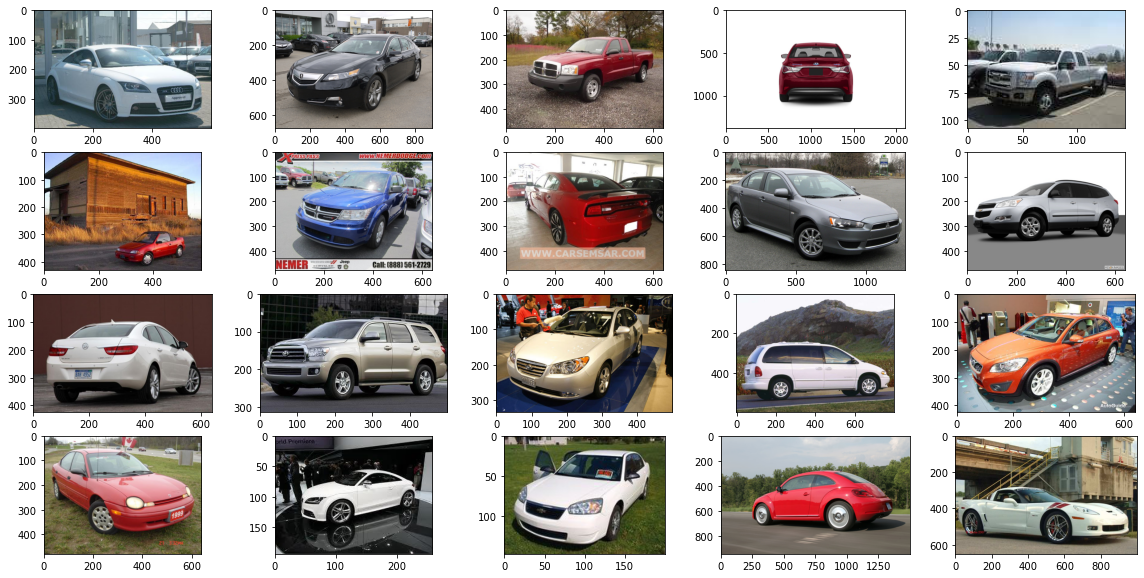

In [32]:
# Visualizing train images
plt.figure(figsize=(20,10)) 
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    plt.imshow(plt.imread(car_train_image_details['imagePath'][i]))

Now Let us visualize train images with its bounding box.

In [33]:
def display_image_with_bounding_box(imageDetails):
    imagePath=imageDetails.imagePath
    img_arr = cv2.imread(imagePath)
    cv2.rectangle(img_arr, (imageDetails.X1, imageDetails.Y1), (imageDetails.X2, imageDetails.Y2), (255, 0, 0), 3)
    plt.imshow(img_arr)
    print(imageDetails['class'])
    

Buick Verano Sedan 2012


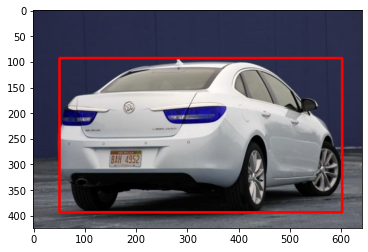

In [34]:
display_image_with_bounding_box(car_train_image_details.iloc[10,:])

Plymouth Neon Coupe 1999


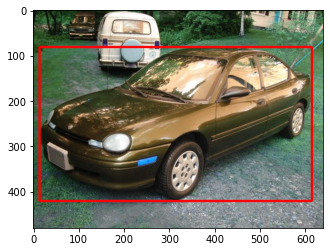

In [35]:
display_image_with_bounding_box(car_train_image_details.iloc[3333,:])

Audi 100 Sedan 1994


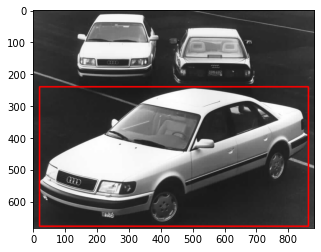

In [36]:
display_image_with_bounding_box(car_train_image_details.iloc[8143,:])

Audi TTS Coupe 2012
Acura TL Sedan 2012
Dodge Dakota Club Cab 2007
Hyundai Sonata Hybrid Sedan 2012
Ford F-450 Super Duty Crew Cab 2012
Geo Metro Convertible 1993
Dodge Journey SUV 2012
Dodge Charger Sedan 2012
Mitsubishi Lancer Sedan 2012
Chevrolet Traverse SUV 2012
Buick Verano Sedan 2012
Toyota Sequoia SUV 2012
Hyundai Elantra Sedan 2007
Dodge Caravan Minivan 1997
Volvo C30 Hatchback 2012
Plymouth Neon Coupe 1999
Audi TTS Coupe 2012
Chevrolet Malibu Sedan 2007
Volkswagen Beetle Hatchback 2012
Chevrolet Corvette Ron Fellows Edition Z06 2007


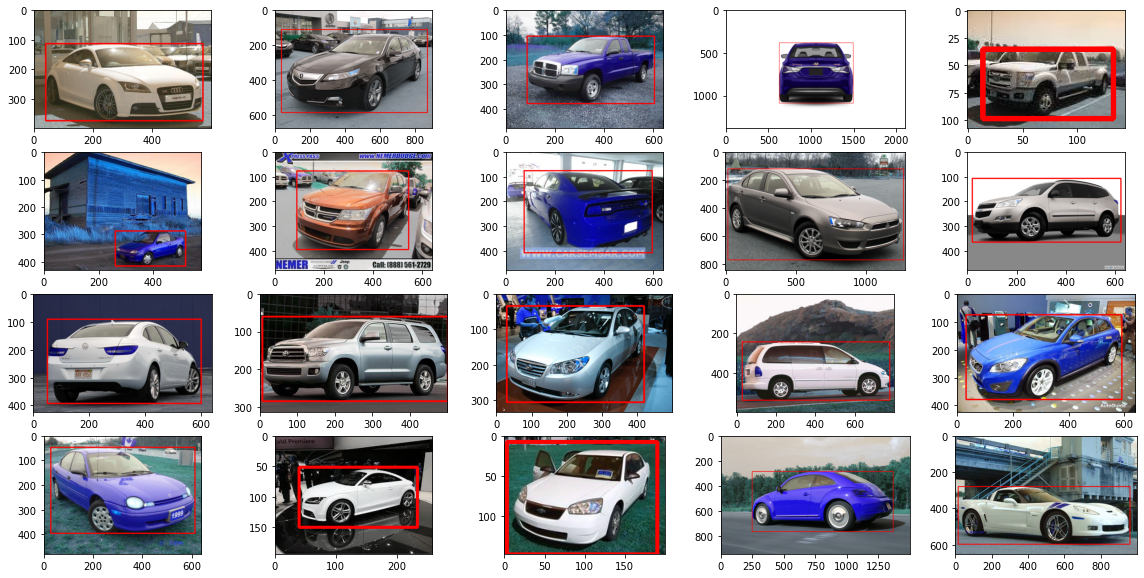

In [37]:
# Visualizing First 20 train images with bounding boxes
plt.figure(figsize=(20,10)) 
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    display_image_with_bounding_box(car_train_image_details.iloc[i,:])

In [38]:
car_test_image_details = pd.merge(cars_test_data, cars_test_annotations, 
                   on='Image Name', 
                   how='outer')

In [39]:
car_test_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Test Images/Suzuki Aerio Se...   
1     00002.jpg  Dataset/Car Images/Test Images/Ferrari 458 Ita...   
2     00003.jpg  Dataset/Car Images/Test Images/Jeep Patriot SU...   
3     00004.jpg  Dataset/Car Images/Test Images/Toyota Camry Se...   
4     00005.jpg  Dataset/Car Images/Test Images/Tesla Model S S...   
...         ...                                                ...   
8036  08037.jpg  Dataset/Car Images/Test Images/Chevrolet Sonic...   
8037  08038.jpg  Dataset/Car Images/Test Images/Audi V8 Sedan 1...   
8038  08039.jpg  Dataset/Car Images/Test Images/Audi 100 Sedan ...   
8039  08040.jpg  Dataset/Car Images/Test Images/BMW Z4 Converti...   
8040  08041.jpg  Dataset/Car Images/Test Images/BMW X5 SUV 2007...   

                                    class  height  width  \
0                 Suzuki Aerio Sedan 2007     182    276   
1     Ferrari 458 Italia Convertible 2012     360    640   
2                   Jeep Patriot SUV 2012     741   1024   
3                 Toyota Camry Sedan 2012     480    640   
4                Tesla Model S Sedan 2012     373    600   
...                                   ...     ...    ...   
8036           Chevrolet Sonic Sedan 2012     800   1200   
8037                   Audi V8 Sedan 1994     480    640   
8038                  Audi 100 Sedan 1994     303    635   
8039              BMW Z4 Convertible 2012     427    640   
8040                      BMW X5 SUV 2007     426    640   

      Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                           30          52         246         147   
1                          100          19         576         203   
2                           51         105         968         659   
3                           67          84         581         407   
4                          140         151         593         339   
...                        ...         ...         ...         ...   
8036                        49          57        1169         669   
8037                        23          18         640         459   
8038                        33          27         602         252   
8039                        33         142         521         376   
8040                        77          73         506         380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 10 columns]

In [40]:
#Renaming unnamed columns
car_test_image_details.rename(columns = {'Bounding Box coordinates': 'X1','Unnamed: 2':'Y1','Unnamed: 3':'X2','Unnamed: 4':'Y2'},inplace = True)


In [41]:
car_test_image_details['Image class'].value_counts()

119    68
161    48
79     48
167    47
20     46
       ..
175    30
64     29
158    29
99     27
136    24
Name: Image class, Length: 196, dtype: int64

In [42]:
car_test_image_details['class'].value_counts()

GMC Savana Van 2012                                    68
Mercedes-Benz 300-Class Convertible 1993               48
Chrysler 300 SRT-8 2010                                48
Mitsubishi Lancer Sedan 2012                           47
Audi S6 Sedan 2011                                     46
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    30
Maybach Landaulet Convertible 2012                     29
Chevrolet Express Cargo Van 2007                       29
FIAT 500 Abarth 2012                                   27
Hyundai Accent Sedan 2012                              24
Name: class, Length: 196, dtype: int64

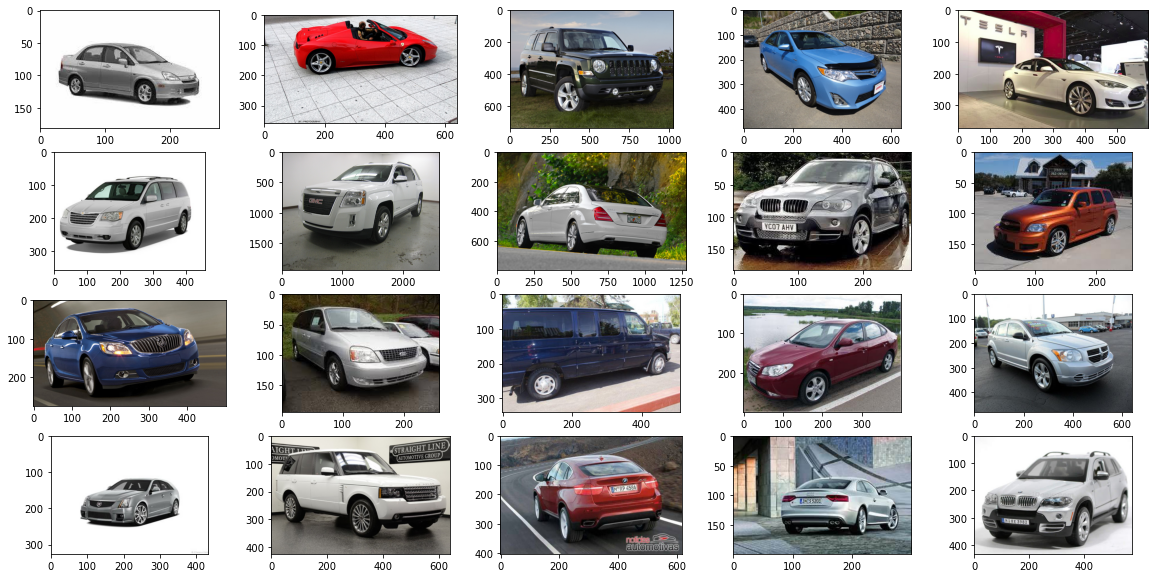

In [43]:
# Visualizing test images
plt.figure(figsize=(20,10)) 
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    plt.imshow(plt.imread(car_test_image_details['imagePath'][i]))

We can see that train images are mapped to its classes and annotations. Let us visualize 5 test images with its bounding box.

Suzuki Aerio Sedan 2007


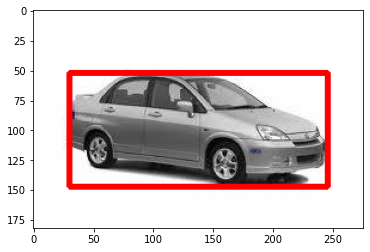

In [44]:
display_image_with_bounding_box(car_test_image_details.iloc[0,:])

Buick Verano Sedan 2012


(None,)

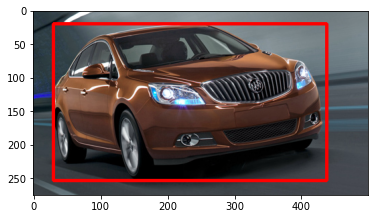

In [45]:
display_image_with_bounding_box(car_test_image_details.iloc[10,:]), 

Mercedes-Benz S-Class Sedan 2012


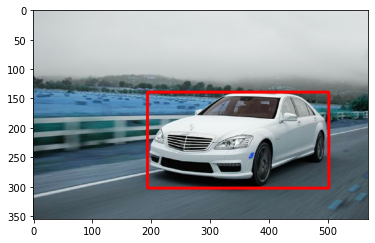

In [46]:
display_image_with_bounding_box(car_test_image_details.iloc[3000,:])

Hyundai Veloster Hatchback 2012


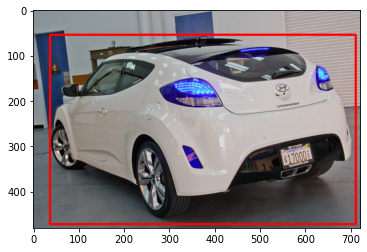

In [47]:
display_image_with_bounding_box(car_test_image_details.iloc[8000,:])

BMW X5 SUV 2007


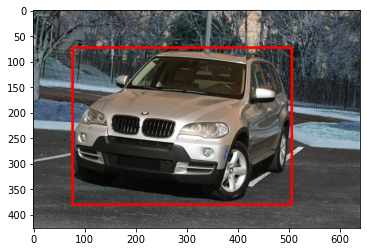

In [48]:
display_image_with_bounding_box(car_test_image_details.iloc[8040,:])

Suzuki Aerio Sedan 2007
Ferrari 458 Italia Convertible 2012
Jeep Patriot SUV 2012
Toyota Camry Sedan 2012
Tesla Model S Sedan 2012
Chrysler Town and Country Minivan 2012
GMC Terrain SUV 2012
Mercedes-Benz S-Class Sedan 2012
BMW X5 SUV 2007
Chevrolet HHR SS 2010
Buick Verano Sedan 2012
Ford Freestar Minivan 2007
Ford E-Series Wagon Van 2012
Hyundai Elantra Sedan 2007
Dodge Caliber Wagon 2012
Cadillac CTS-V Sedan 2012
Land Rover Range Rover SUV 2012
BMW X6 SUV 2012
Audi S5 Coupe 2012
BMW X5 SUV 2007


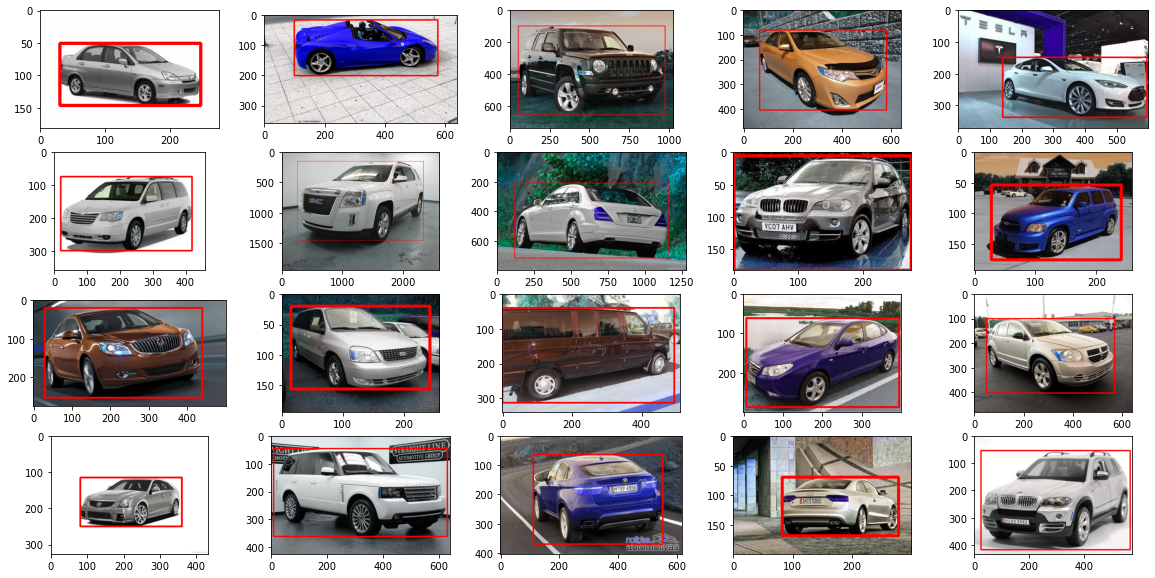

In [49]:
# Visualizing First 20 test images with bounding boxes
plt.figure(figsize=(20,10)) 
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    display_image_with_bounding_box(car_test_image_details.iloc[i,:])

### EDA and Data Visualizations
Importing Car names.

In [169]:
car_labels_data = pd.read_csv('Dataset/Car names and make.csv',header=None,names =['labels'])
car_labels_data

labels
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [170]:
print('Found one Class name: Ram C/V Cargo Van Minivan 2012, not in sync with directory path, renaming it')
car_labels_data['labels'].replace({"Ram C/V Cargo Van Minivan 2012": "Ram C-V Cargo Van Minivan 2012"}, inplace=True)

Found one Class name: Ram C/V Cargo Van Minivan 2012, not in sync with directory path, renaming it


In [171]:
car_labels_data.sort_values(['labels'], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
car_labels_data = car_labels_data.reset_index()

In [172]:
car_labels_data['year'] = car_labels_data['labels'].str[-4:]
car_labels_data['labels'] = car_labels_data['labels'].apply(lambda x:x[:-4])

In [173]:
car_labels_data

index                      labels  year
0        0      AM General Hummer SUV   2000
1        5       Acura Integra Type R   2001
2        1             Acura RL Sedan   2012
3        2             Acura TL Sedan   2012
4        3            Acura TL Type-S   2008
..     ...                         ...   ...
191    189  Volkswagen Golf Hatchback   2012
192    193            Volvo 240 Sedan   1993
193    192        Volvo C30 Hatchback   2012
194    194             Volvo XC90 SUV   2007
195    195   smart fortwo Convertible   2012

[196 rows x 3 columns]

In [177]:
# Function which returns last word
def lastWord(string):
   
    # split by space and converting
    # string to list and
    lis = list(string.split(" "))
     
    # length of list
    length = len(lis)
     
    # returning last element in list
    last_word= lis[length-2]
    if(last_word == 'R'):
        last_word='Type R'
    return last_word


In [178]:
lastWord(car_labels_data.iloc[0,:].labels)

'SUV'

In [179]:
lastWord(car_labels_data.iloc[1,:].labels)

'Type R'

In [180]:
car_labels_data['type'] = car_labels_data['labels'].apply(lambda x:lastWord(x))

In [181]:
car_labels_data

index                      labels  year         type
0        0      AM General Hummer SUV   2000          SUV
1        5       Acura Integra Type R   2001       Type R
2        1             Acura RL Sedan   2012        Sedan
3        2             Acura TL Sedan   2012        Sedan
4        3            Acura TL Type-S   2008       Type-S
..     ...                         ...   ...          ...
191    189  Volkswagen Golf Hatchback   2012    Hatchback
192    193            Volvo 240 Sedan   1993        Sedan
193    192        Volvo C30 Hatchback   2012    Hatchback
194    194             Volvo XC90 SUV   2007          SUV
195    195   smart fortwo Convertible   2012  Convertible

[196 rows x 4 columns]

In [182]:
car_labels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   196 non-null    int64 
 1   labels  196 non-null    object
 2   year    196 non-null    object
 3   type    196 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [183]:
car_labels_data.type.value_counts()

Sedan           46
SUV             34
Convertible     26
Coupe           25
Cab             17
Hatchback       13
Van              7
Minivan          6
Wagon            6
SS               3
SRT-8            2
Z06              1
SuperCab         1
GS               1
Type-S           1
Superleggera     1
SRT8             1
Abarth           1
Type R           1
ZR1              1
IPL              1
XKR              1
Name: type, dtype: int64

In [184]:
car_labels_data.labels.value_counts()

Bentley Continental GT Coupe                   2
Volkswagen Golf Hatchback                      2
Ford F-150 Regular Cab                         2
Dodge Durango SUV                              2
Honda Odyssey Minivan                          2
                                              ..
BMW 1 Series Convertible                       1
Dodge Challenger SRT8                          1
GMC Acadia SUV                                 1
Lamborghini Gallardo LP 570-4 Superleggera     1
Infiniti G Coupe IPL                           1
Name: labels, Length: 189, dtype: int64

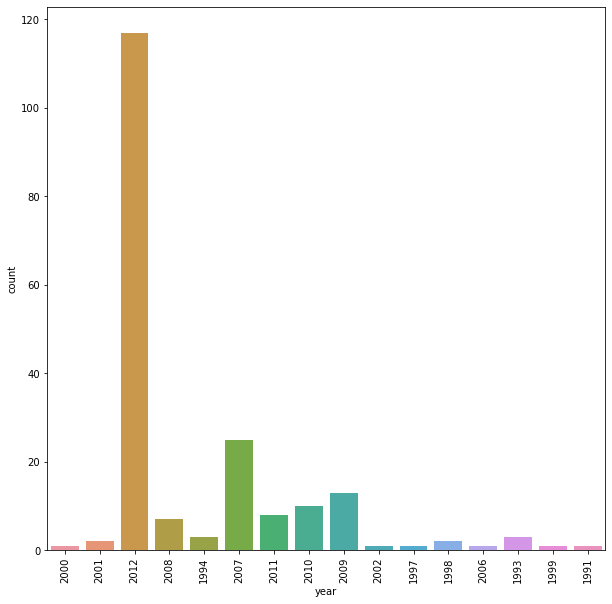

In [185]:
plt.figure(figsize=(10,10))
sns.countplot(x='year',data=car_labels_data)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

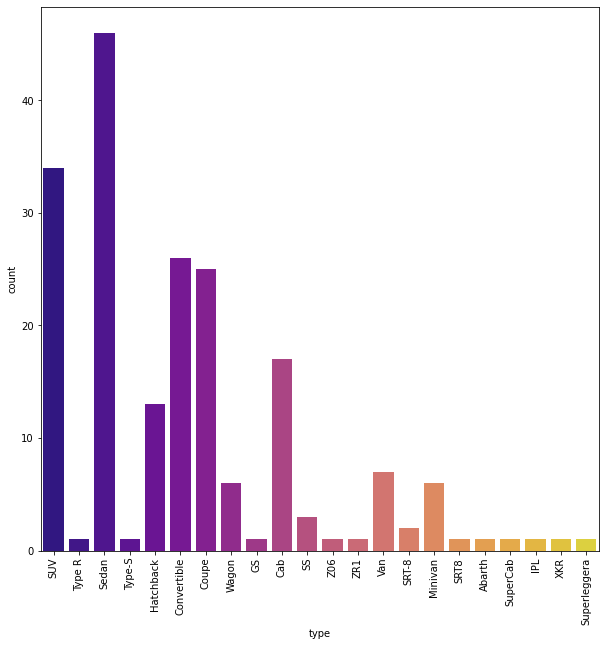

In [186]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
sns.countplot(data=car_labels_data, x='type', palette='plasma')

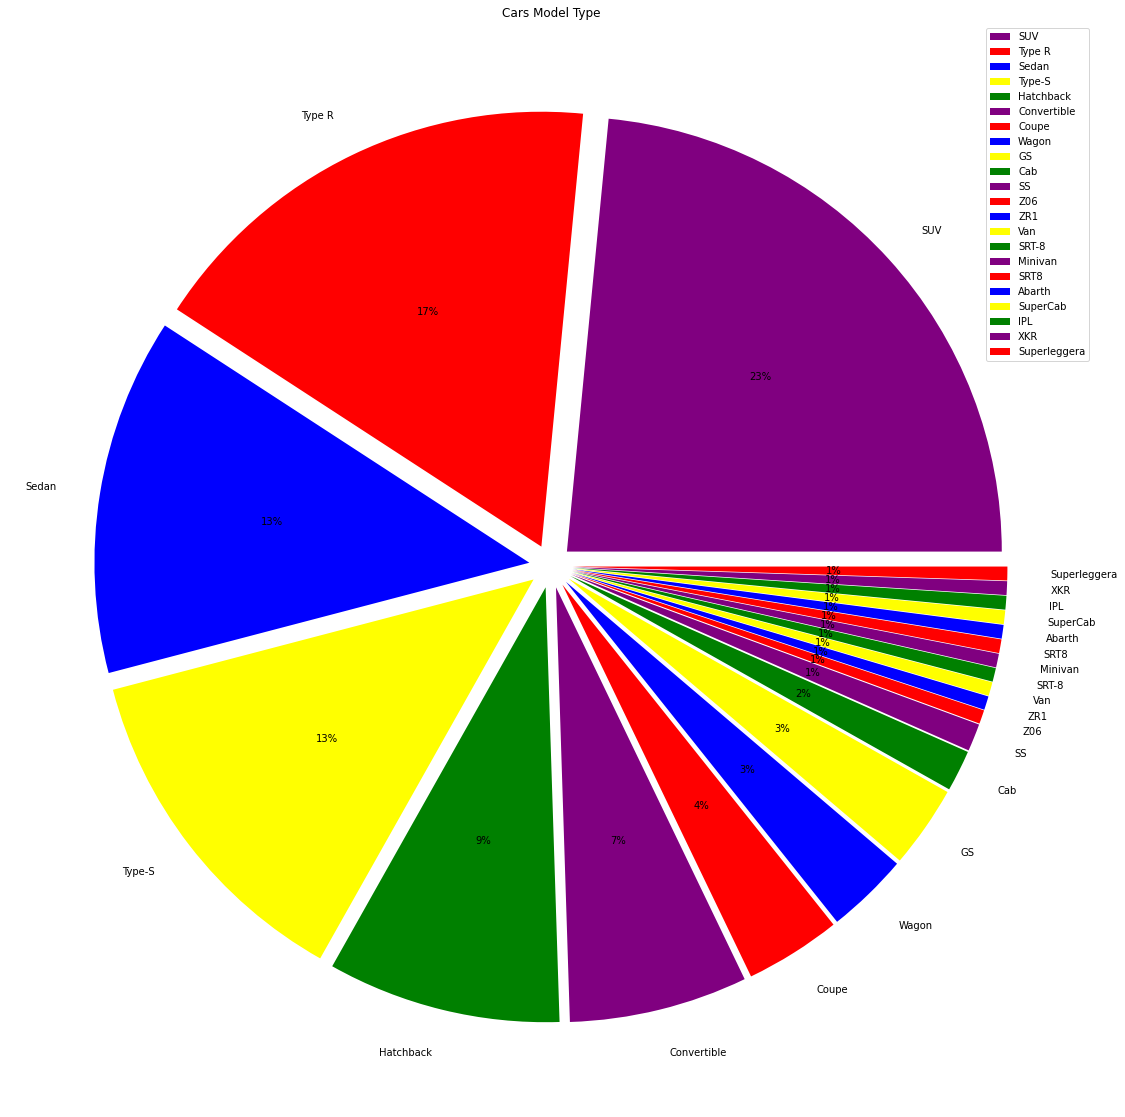

In [187]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))

df_car_model_type = pd.DataFrame(car_labels_data['type'].value_counts()).reset_index()
df_car_model_type.columns = ['Car Model Type', 'count']

colors = ['purple', 'red', 'blue', 'yellow', 'green']
labels = car_labels_data['type'].unique()
type_count = car_labels_data['type'].nunique()

ax1.pie(df_car_model_type['count'], labels = labels, colors=colors, explode=[0.05]*type_count, autopct='%.0f%%')
ax1.set_title('Cars Model Type')
ax1.legend(labels, loc = 'upper right')


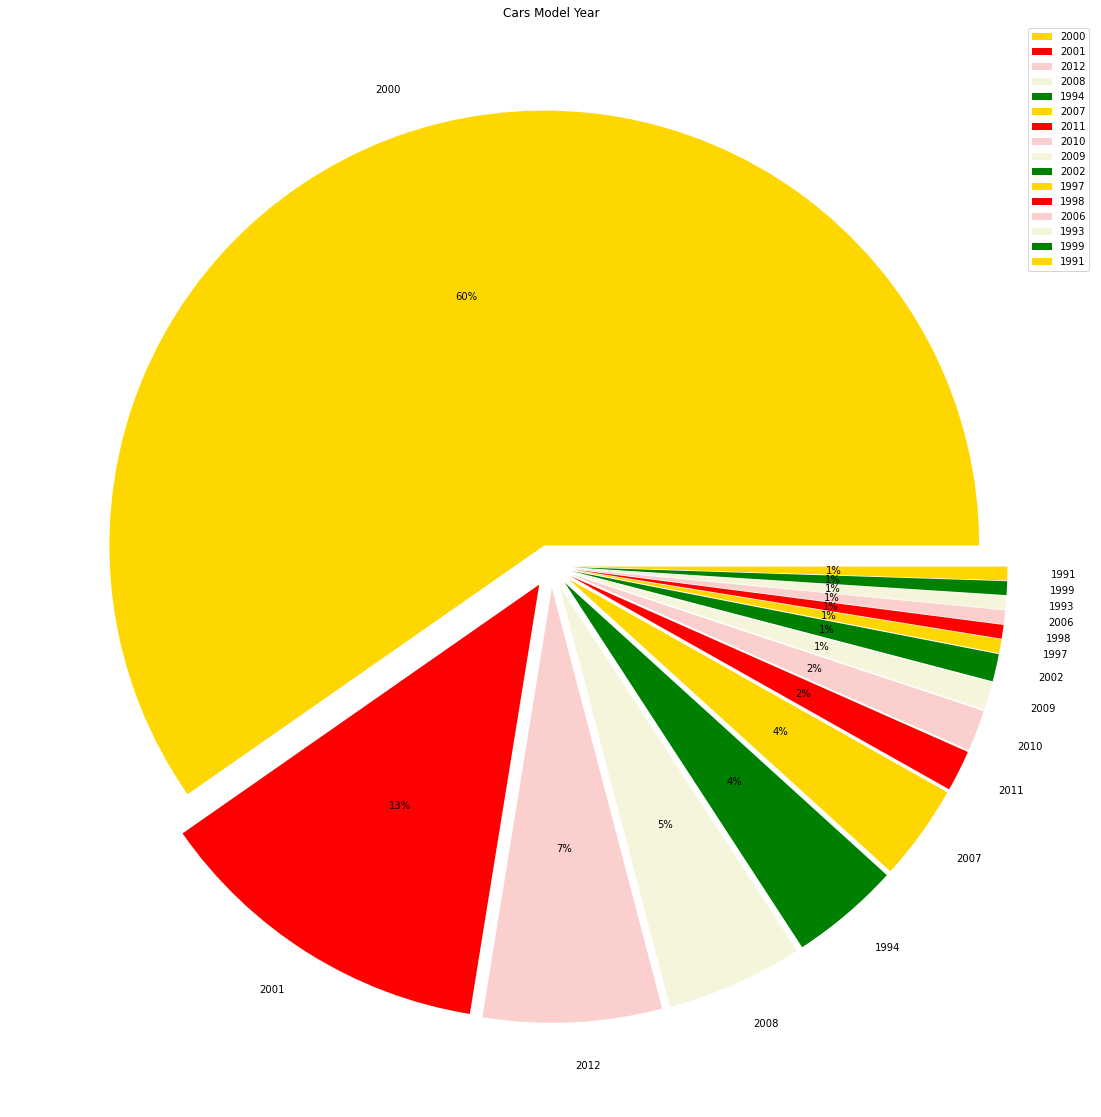

In [188]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))

df_car_model_year = pd.DataFrame(car_labels_data['year'].value_counts()).reset_index()
df_car_model_year.columns = ['Car Model Year', 'count']

colors = ['gold', 'red', '#FBCFCD', '#F5F5DC', 'green']
labels = car_labels_data['year'].unique()
year_count = car_labels_data['year'].nunique()

ax1.pie(df_car_model_year['count'], labels = labels, colors=colors, explode=[0.05]*year_count, autopct='%.0f%%')
ax1.set_title('Cars Model Year')
ax1.legend(labels, loc = 'upper right')



<AxesSubplot:xlabel='year', ylabel='type'>

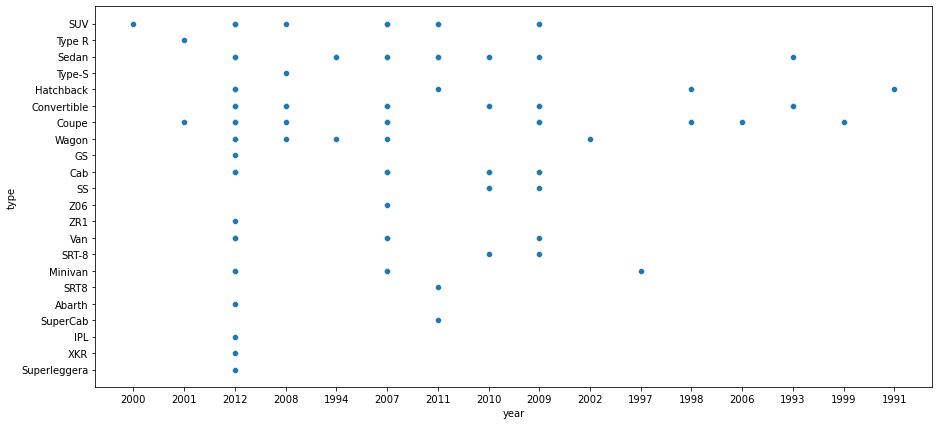

In [189]:
figure = plt.figure(figsize=(15,7))
sns.scatterplot(x='year', y='type', data=car_labels_data)

<AxesSubplot:xlabel='year', ylabel='type'>

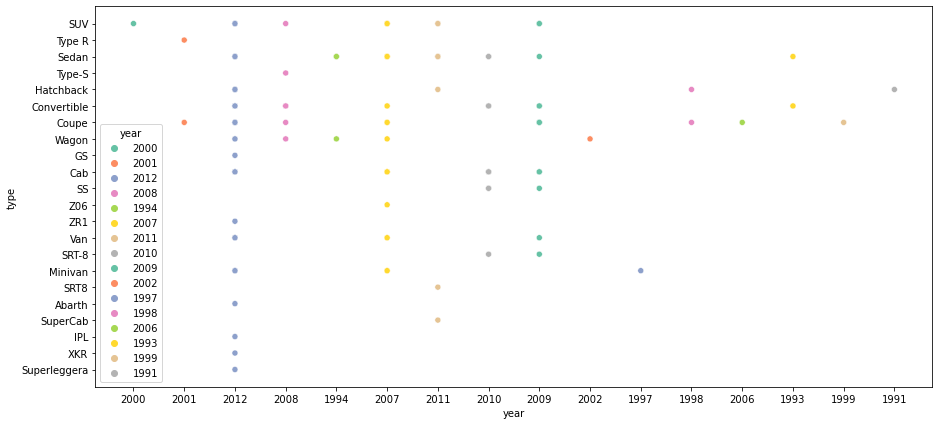

In [190]:
figure = plt.figure(figsize=(15,7))
sns.scatterplot(car_labels_data['year'], car_labels_data['type'], hue=car_labels_data['year'], palette='Set2') 

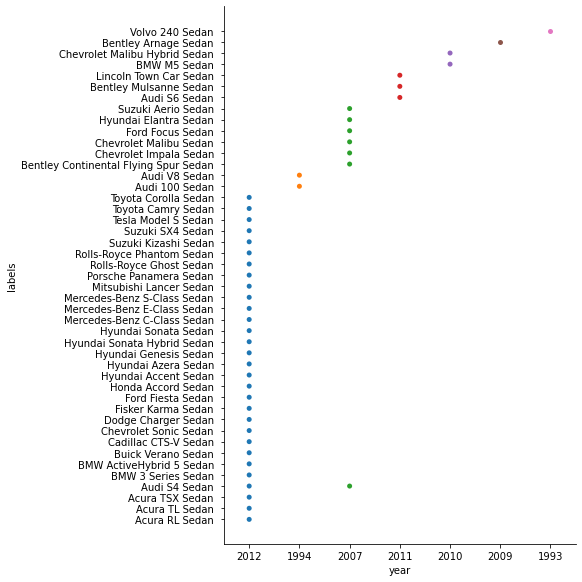

In [191]:
# filtering the rows for Sedan
df=car_labels_data[car_labels_data['labels'].str.contains('Sedan')]
sns.catplot(y="labels", x="year", data=df,kind="swarm",height=8, aspect=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

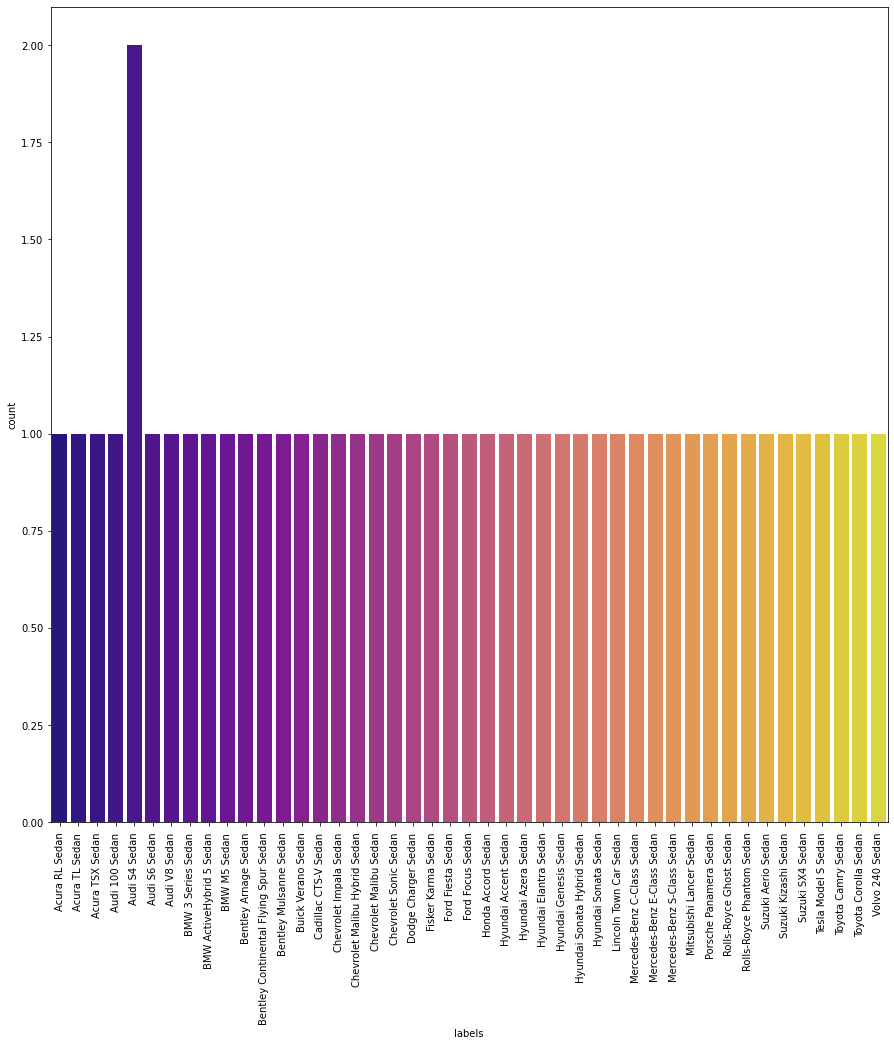

In [193]:
figure = plt.figure(figsize=(15,15))
plt.xticks(rotation='vertical')
sns.countplot(data=df, x='labels',palette='plasma')

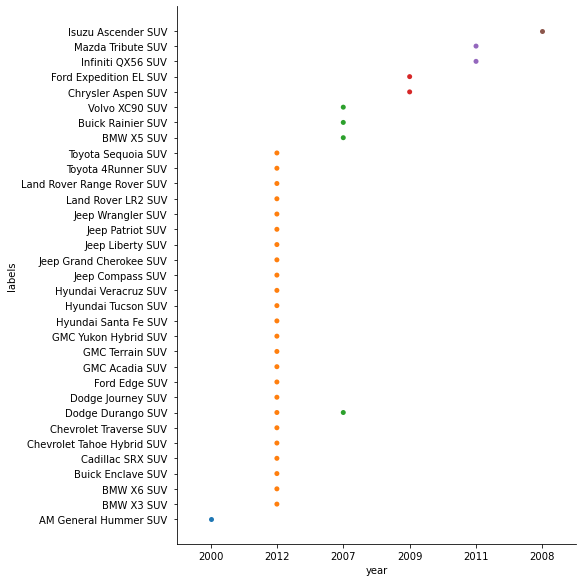

In [194]:
# filtering the rows for SUV
df2=car_labels_data[car_labels_data['labels'].str.contains('SUV')]
sns.catplot(y="labels", x="year", data=df2,kind="swarm",height=8, aspect=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

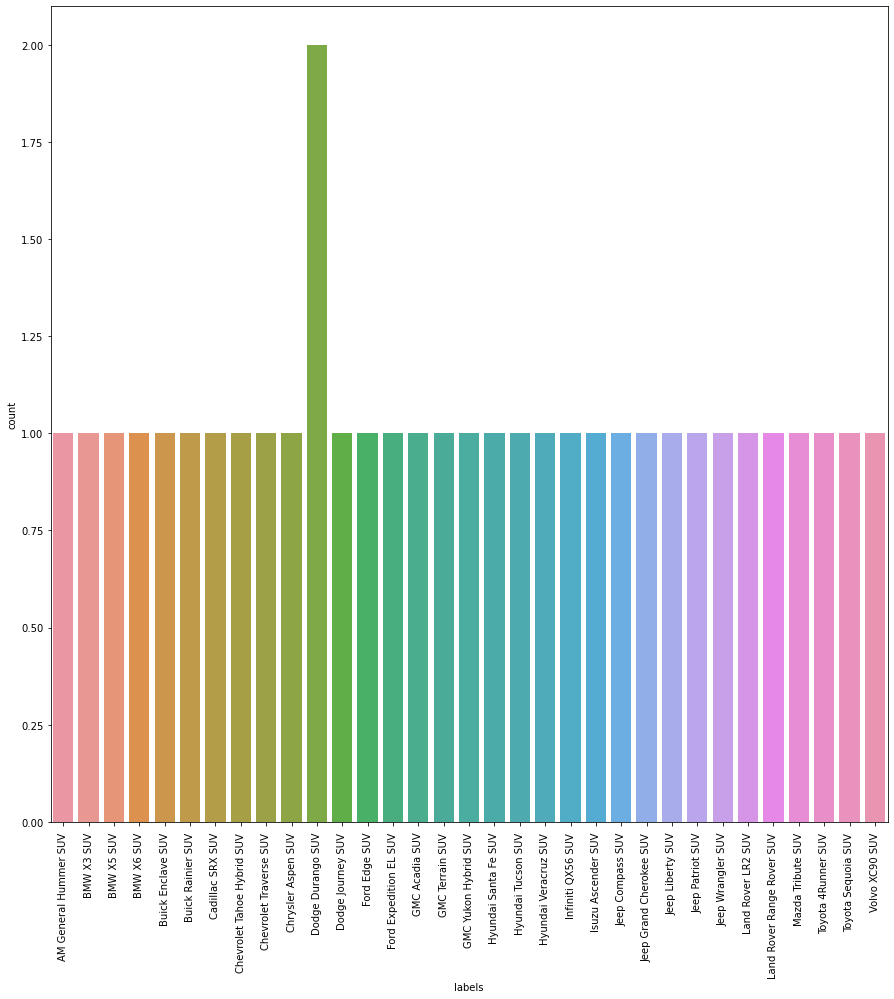

In [195]:
figure = plt.figure(figsize=(15,15))
plt.xticks(rotation='vertical')
sns.countplot(data=df2, x='labels')

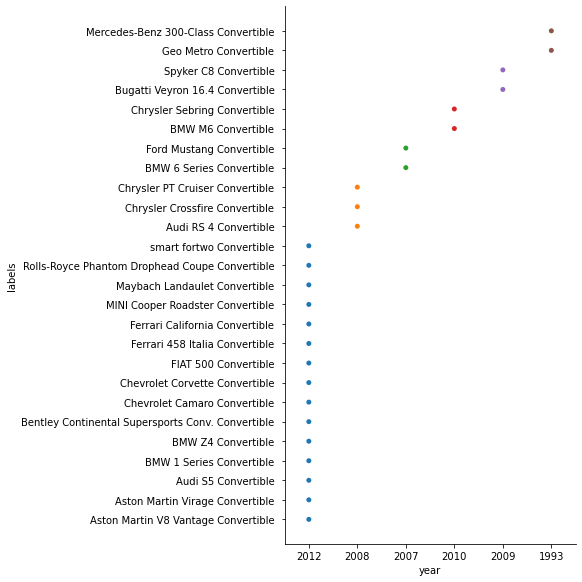

In [196]:
# filtering the rows for Convertible
df3=car_labels_data[car_labels_data['labels'].str.contains('Convertible')]
sns.catplot(y="labels", x="year", data=df3,kind="swarm",height=8, aspect=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

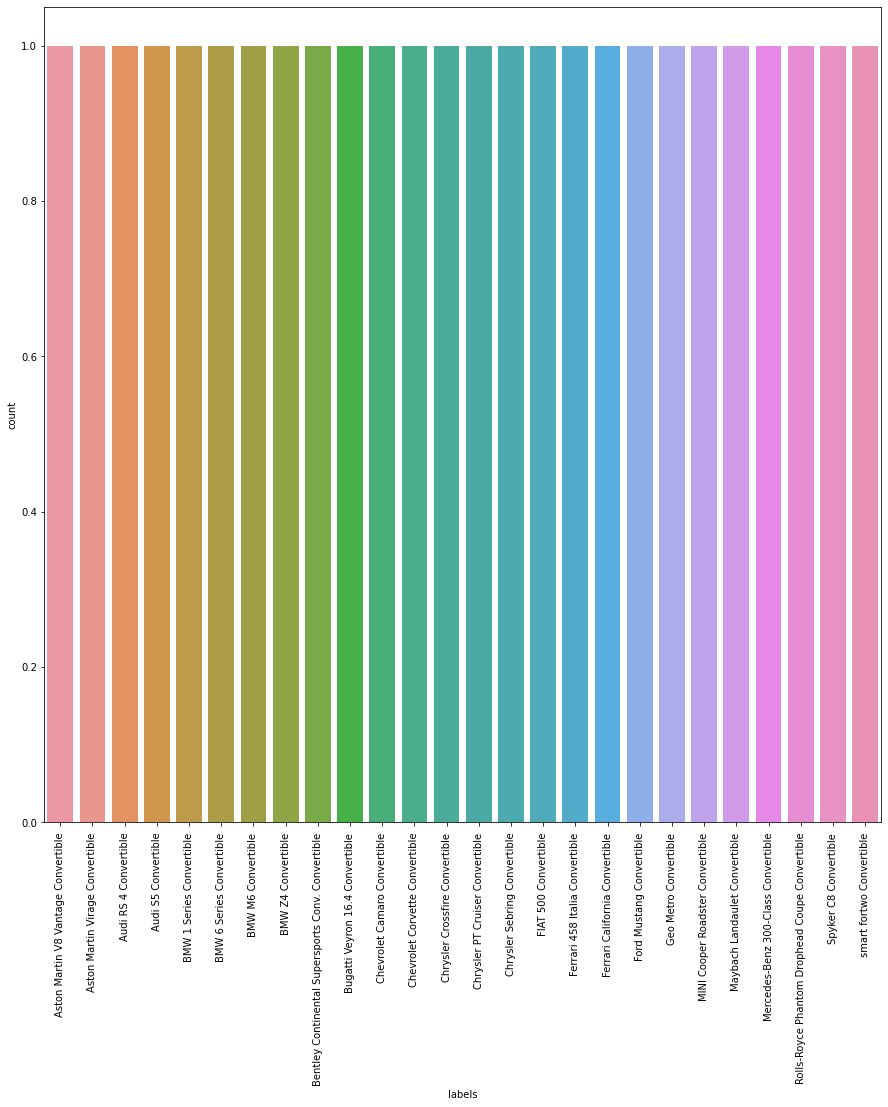

In [197]:
figure = plt.figure(figsize=(15,15))
plt.xticks(rotation='vertical')
sns.countplot(data=df3, x='labels')

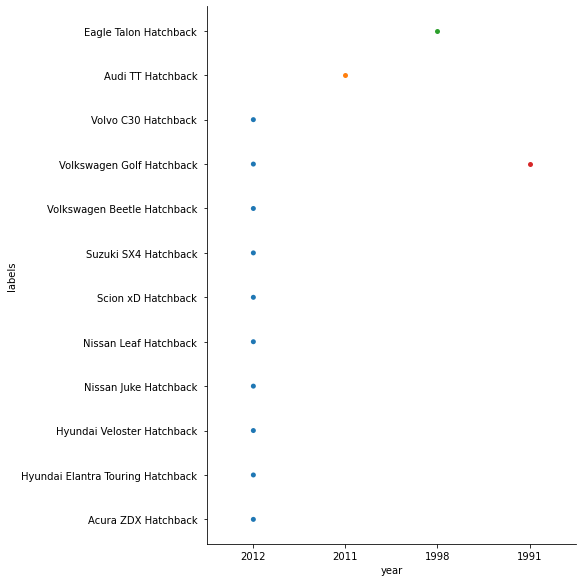

In [198]:
# filtering the rows for Hatchback
df4=car_labels_data[car_labels_data['labels'].str.contains('Hatchback')]
sns.catplot(y="labels", x="year", data=df4,kind="swarm",height=8, aspect=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

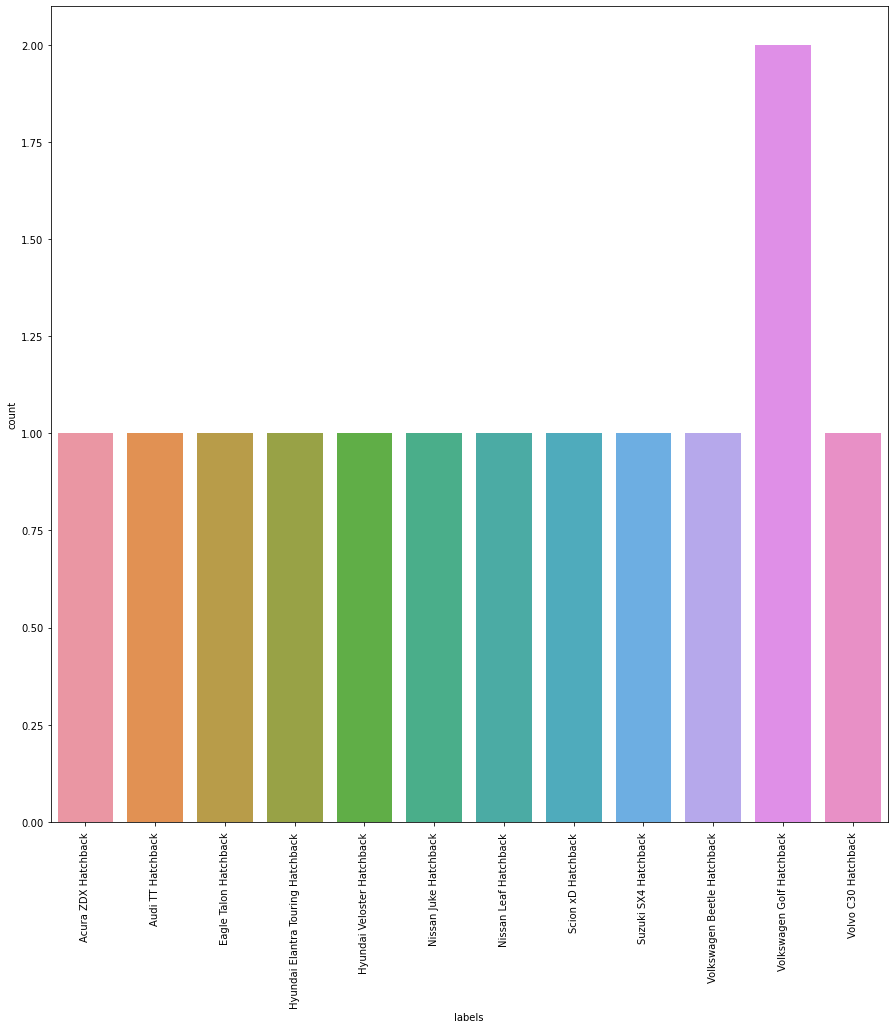

In [199]:
figure = plt.figure(figsize=(15,15))
plt.xticks(rotation='vertical')
sns.countplot(data=df4, x='labels')

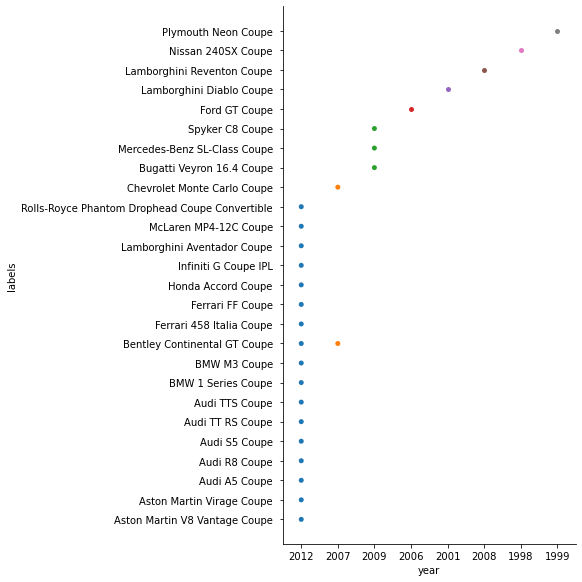

In [200]:
# filtering the rows for Coupe
df5=car_labels_data[car_labels_data['labels'].str.contains('Coupe')]
sns.catplot(y="labels", x="year", data=df5,kind="swarm",height=8, aspect=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

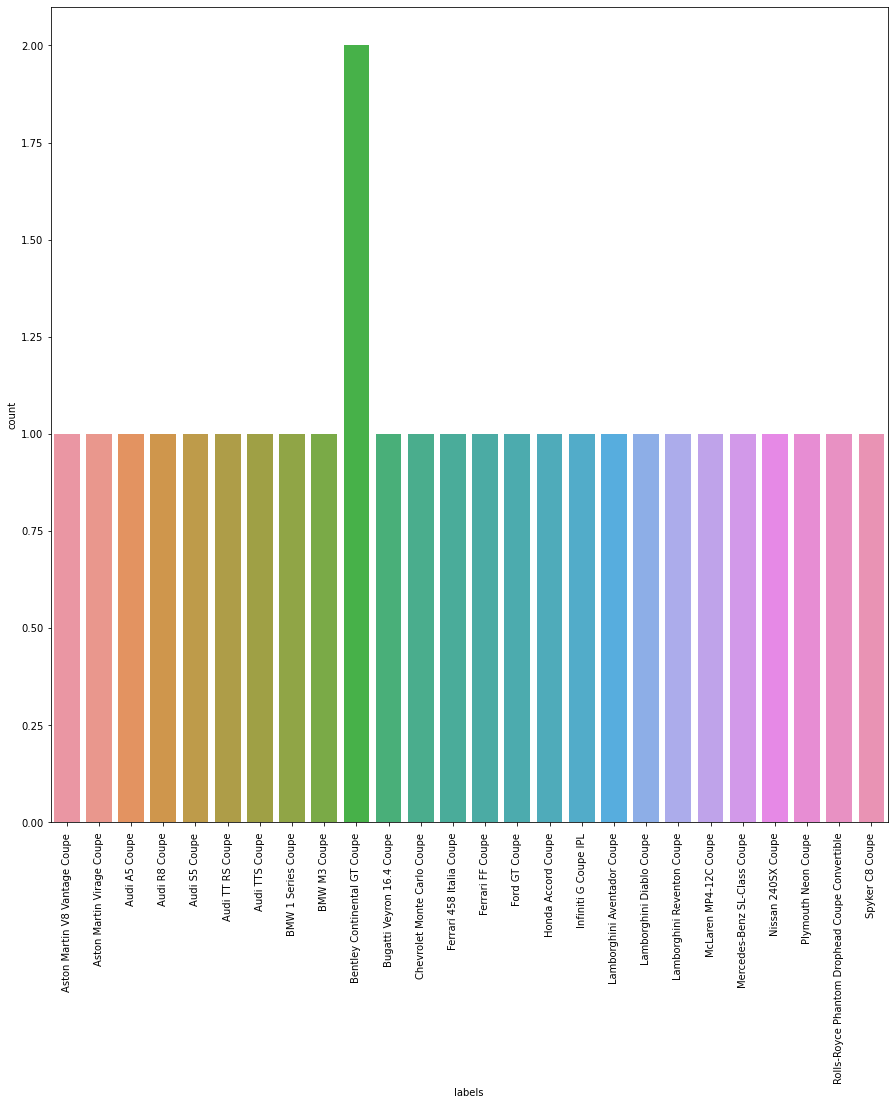

In [201]:
figure = plt.figure(figsize=(15,15))
plt.xticks(rotation='vertical')
sns.countplot(data=df5, x='labels')

In [202]:
text = " ".join(name for name in car_labels_data.labels)
print ("There are {} words in the combination of all records.".format(len(text)))

There are 4669 words in the combination of all records.


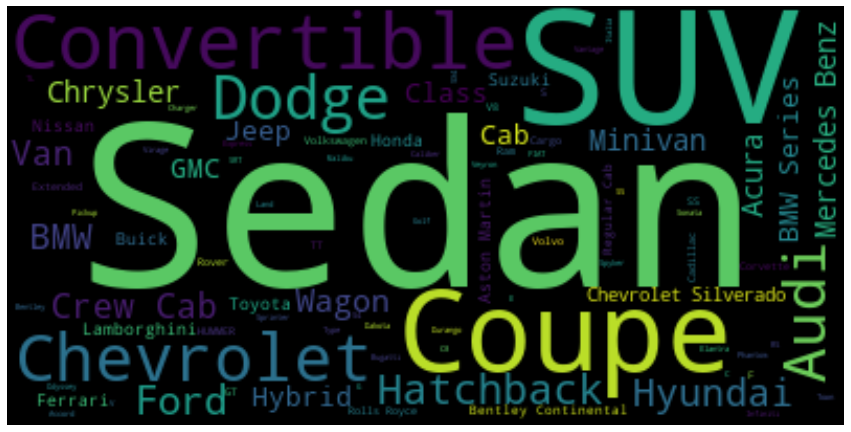

In [203]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(text)

figure = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [210]:
car_labels = car_labels_data['labels'].to_list()

In [211]:
car_labels

['AM General Hummer SUV ',
 'Acura Integra Type R ',
 'Acura RL Sedan ',
 'Acura TL Sedan ',
 'Acura TL Type-S ',
 'Acura TSX Sedan ',
 'Acura ZDX Hatchback ',
 'Aston Martin V8 Vantage Convertible ',
 'Aston Martin V8 Vantage Coupe ',
 'Aston Martin Virage Convertible ',
 'Aston Martin Virage Coupe ',
 'Audi 100 Sedan ',
 'Audi 100 Wagon ',
 'Audi A5 Coupe ',
 'Audi R8 Coupe ',
 'Audi RS 4 Convertible ',
 'Audi S4 Sedan ',
 'Audi S4 Sedan ',
 'Audi S5 Convertible ',
 'Audi S5 Coupe ',
 'Audi S6 Sedan ',
 'Audi TT Hatchback ',
 'Audi TT RS Coupe ',
 'Audi TTS Coupe ',
 'Audi V8 Sedan ',
 'BMW 1 Series Convertible ',
 'BMW 1 Series Coupe ',
 'BMW 3 Series Sedan ',
 'BMW 3 Series Wagon ',
 'BMW 6 Series Convertible ',
 'BMW ActiveHybrid 5 Sedan ',
 'BMW M3 Coupe ',
 'BMW M5 Sedan ',
 'BMW M6 Convertible ',
 'BMW X3 SUV ',
 'BMW X5 SUV ',
 'BMW X6 SUV ',
 'BMW Z4 Convertible ',
 'Bentley Arnage Sedan ',
 'Bentley Continental Flying Spur Sedan ',
 'Bentley Continental GT Coupe ',
 'Bentley

In [212]:
#Creating a Dictionary of training image classes.
num_classes = car_train_image_details['Image class'].unique()
label_class_dict = dict(zip(car_train_image_details['class'], car_train_image_details['Image class']))

In [264]:
len(num_classes)

196

In [213]:
label_class_dict

{'Audi TTS Coupe 2012': 14,
 'Acura TL Sedan 2012': 3,
 'Dodge Dakota Club Cab 2007': 91,
 'Hyundai Sonata Hybrid Sedan 2012': 134,
 'Ford F-450 Super Duty Crew Cab 2012': 106,
 'Geo Metro Convertible 1993': 123,
 'Dodge Journey SUV 2012': 89,
 'Dodge Charger Sedan 2012': 96,
 'Mitsubishi Lancer Sedan 2012': 167,
 'Chevrolet Traverse SUV 2012': 58,
 'Buick Verano Sedan 2012': 49,
 'Toyota Sequoia SUV 2012': 186,
 'Hyundai Elantra Sedan 2007': 135,
 'Dodge Caravan Minivan 1997': 85,
 'Volvo C30 Hatchback 2012': 193,
 'Plymouth Neon Coupe 1999': 172,
 'Chevrolet Malibu Sedan 2007': 73,
 'Volkswagen Beetle Hatchback 2012': 192,
 'Chevrolet Corvette Ron Fellows Edition Z06 2007': 57,
 'Chrysler 300 SRT-8 2010': 79,
 'BMW M6 Convertible 2010': 36,
 'GMC Yukon Hybrid SUV 2012': 120,
 'Nissan Juke Hatchback 2012': 170,
 'Volvo 240 Sedan 1993': 194,
 'Suzuki SX4 Sedan 2012': 184,
 'Dodge Ram Pickup 3500 Crew Cab 2010': 86,
 'Spyker C8 Coupe 2009': 180,
 'Land Rover Range Rover SUV 2012': 154,


In [214]:
car_train_image_details.sort_values(['Image class'],axis=0).reset_index()

index Image Name                                          imagePath  \
0      6173  06174.jpg  Dataset/Car Images/Train Images/AM General Hum...   
1      5920  05921.jpg  Dataset/Car Images/Train Images/AM General Hum...   
2      3392  03393.jpg  Dataset/Car Images/Train Images/AM General Hum...   
3      4543  04544.jpg  Dataset/Car Images/Train Images/AM General Hum...   
4       945  00946.jpg  Dataset/Car Images/Train Images/AM General Hum...   
...     ...        ...                                                ...   
8139   7894  07895.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8140   6003  06004.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8141   2102  02103.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8142   2391  02392.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8143   4360  04361.jpg  Dataset/Car Images/Train Images/smart fortwo C...   

                              class  height  width   X1   Y1    X2    Y2  \
0        AM General Hummer SUV 2000     179    300    1    1   300   179   
1        AM General Hummer SUV 2000     743   1024  111  213   907   683   
2        AM General Hummer SUV 2000    1600   2405  125  645  1845  1421   
3        AM General Hummer SUV 2000     200    339   18   18   328   190   
4        AM General Hummer SUV 2000     219    460   48   24   441   202   
...                             ...     ...    ...  ...  ...   ...   ...   
8139  smart fortwo Convertible 2012     272    500   31    6   494   272   
8140  smart fortwo Convertible 2012     194    259    8    7   256   190   
8141  smart fortwo Convertible 2012     683   1024   34  262   766   650   
8142  smart fortwo Convertible 2012     123    212   17   13   197   115   
8143  smart fortwo Convertible 2012     168    300   19   40   210   150   

      Image class  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
8139          196  
8140          196  
8141          196  
8142          196  
8143          196  

[8144 rows x 11 columns]

In [215]:
car_test_image_details.sort_values(['Image class'],axis=0).reset_index()

index Image Name                                          imagePath  \
0      4116  04117.jpg  Dataset/Car Images/Test Images/AM General Humm...   
1      3875  03876.jpg  Dataset/Car Images/Test Images/AM General Humm...   
2      5022  05023.jpg  Dataset/Car Images/Test Images/AM General Humm...   
3      1517  01518.jpg  Dataset/Car Images/Test Images/AM General Humm...   
4      1537  01538.jpg  Dataset/Car Images/Test Images/AM General Humm...   
...     ...        ...                                                ...   
8036   7466  07467.jpg  Dataset/Car Images/Test Images/smart fortwo Co...   
8037   4489  04490.jpg  Dataset/Car Images/Test Images/smart fortwo Co...   
8038   3482  03483.jpg  Dataset/Car Images/Test Images/smart fortwo Co...   
8039   5705  05706.jpg  Dataset/Car Images/Test Images/smart fortwo Co...   
8040   1292  01293.jpg  Dataset/Car Images/Test Images/smart fortwo Co...   

                              class  height  width   X1   Y1    X2   Y2  \
0        AM General Hummer SUV 2000     743   1024  111  177   920  642   
1        AM General Hummer SUV 2000      69     93    8    5    85   69   
2        AM General Hummer SUV 2000     506    800   26   72   774  480   
3        AM General Hummer SUV 2000     520    800   26   62   763  504   
4        AM General Hummer SUV 2000     353    500   32   69   487  316   
...                             ...     ...    ...  ...  ...   ...  ...   
8036  smart fortwo Convertible 2012     545    730   83  102   648  485   
8037  smart fortwo Convertible 2012     850   1280   63  121  1227  795   
8038  smart fortwo Convertible 2012     405    640   77   96   576  367   
8039  smart fortwo Convertible 2012     225    300   30   93   232  215   
8040  smart fortwo Convertible 2012     533    800   82   56   740  502   

      Image class  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
8036          196  
8037          196  
8038          196  
8039          196  
8040          196  

[8041 rows x 11 columns]

#### Here we have got the desired output i.e. Images mapped to its class and annotation ready to be used for deep learning. We have also visualized train and test images with bounding box. We have also created the train, validation and test data set for building CNN model for Cars Classification

### Milestone 2: [ Duration: 2 weeks, Score: 20 points]
#### ‣ Input: Output of milestone 1 ‣ Process:
#### ‣ Step 1: Design, train and test CNN models to classify the car.
#### ‣ Step 2: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.
#### ‣ Output: Pickled model to be used for future prediction 
#### ‣ Submission: Interim report

Let us check train and test csv data

In [114]:
car_train_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Train Images/Audi TTS Coupe...   
1     00002.jpg  Dataset/Car Images/Train Images/Acura TL Sedan...   
2     00003.jpg  Dataset/Car Images/Train Images/Dodge Dakota C...   
3     00004.jpg  Dataset/Car Images/Train Images/Hyundai Sonata...   
4     00005.jpg  Dataset/Car Images/Train Images/Ford F-450 Sup...   
...         ...                                                ...   
8139  08140.jpg  Dataset/Car Images/Train Images/Chrysler Town ...   
8140  08141.jpg  Dataset/Car Images/Train Images/smart fortwo C...   
8141  08142.jpg  Dataset/Car Images/Train Images/Mercedes-Benz ...   
8142  08143.jpg  Dataset/Car Images/Train Images/Ford GT Coupe ...   
8143  08144.jpg  Dataset/Car Images/Train Images/Audi 100 Sedan...   

                                       class height width   X1   Y1    X2  \
0                        Audi TTS Coupe 2012    400   600   39  116   569   
1                        Acura TL Sedan 2012    675   900   36  116   868   
2                 Dodge Dakota Club Cab 2007    480   640   85  109   601   
3           Hyundai Sonata Hybrid Sedan 2012   1386  2100  621  393  1484   
4        Ford F-450 Super Duty Crew Cab 2012    108   144   14   36   133   
...                                      ...    ...   ...  ...  ...   ...   
8139  Chrysler Town and Country Minivan 2012    360   424    3   44   423   
8140           smart fortwo Convertible 2012    600   800  138  150   706   
8141       Mercedes-Benz SL-Class Coupe 2009    469   750   26  246   660   
8142                      Ford GT Coupe 2006   1067  1600   78  526  1489   
8143                     Audi 100 Sedan 1994    683   883   20  240   862   

        Y2  Image class  
0      375           14  
1      587            3  
2      381           91  
3     1096          134  
4       99          106  
...    ...          ...  
8139   336           78  
8140   523          196  
8141   449          163  
8142   908          112  
8143   677           17  

[8144 rows x 10 columns]

In [115]:
car_test_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Test Images/Suzuki Aerio Se...   
1     00002.jpg  Dataset/Car Images/Test Images/Ferrari 458 Ita...   
2     00003.jpg  Dataset/Car Images/Test Images/Jeep Patriot SU...   
3     00004.jpg  Dataset/Car Images/Test Images/Toyota Camry Se...   
4     00005.jpg  Dataset/Car Images/Test Images/Tesla Model S S...   
...         ...                                                ...   
8036  08037.jpg  Dataset/Car Images/Test Images/Chevrolet Sonic...   
8037  08038.jpg  Dataset/Car Images/Test Images/Audi V8 Sedan 1...   
8038  08039.jpg  Dataset/Car Images/Test Images/Audi 100 Sedan ...   
8039  08040.jpg  Dataset/Car Images/Test Images/BMW Z4 Converti...   
8040  08041.jpg  Dataset/Car Images/Test Images/BMW X5 SUV 2007...   

                                    class height width   X1   Y1    X2   Y2  \
0                 Suzuki Aerio Sedan 2007    182   276   30   52   246  147   
1     Ferrari 458 Italia Convertible 2012    360   640  100   19   576  203   
2                   Jeep Patriot SUV 2012    741  1024   51  105   968  659   
3                 Toyota Camry Sedan 2012    480   640   67   84   581  407   
4                Tesla Model S Sedan 2012    373   600  140  151   593  339   
...                                   ...    ...   ...  ...  ...   ...  ...   
8036           Chevrolet Sonic Sedan 2012    800  1200   49   57  1169  669   
8037                   Audi V8 Sedan 1994    480   640   23   18   640  459   
8038                  Audi 100 Sedan 1994    303   635   33   27   602  252   
8039              BMW Z4 Convertible 2012    427   640   33  142   521  376   
8040                      BMW X5 SUV 2007    426   640   77   73   506  380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 10 columns]

CNN Model using Transfer Learning
We are using the built-in module for Inception-ResNet V2 in tf.keras. We are not including the top and we won't import the output layer, as we don't have 1000 different categories. Instead we are adding a few layers for our 12 catagories.

In [227]:
nb_epoch     = 20
batch_size   = 300
width        = 256
height       = 256

In [228]:
label_class_dict

{'Audi TTS Coupe 2012': 14,
 'Acura TL Sedan 2012': 3,
 'Dodge Dakota Club Cab 2007': 91,
 'Hyundai Sonata Hybrid Sedan 2012': 134,
 'Ford F-450 Super Duty Crew Cab 2012': 106,
 'Geo Metro Convertible 1993': 123,
 'Dodge Journey SUV 2012': 89,
 'Dodge Charger Sedan 2012': 96,
 'Mitsubishi Lancer Sedan 2012': 167,
 'Chevrolet Traverse SUV 2012': 58,
 'Buick Verano Sedan 2012': 49,
 'Toyota Sequoia SUV 2012': 186,
 'Hyundai Elantra Sedan 2007': 135,
 'Dodge Caravan Minivan 1997': 85,
 'Volvo C30 Hatchback 2012': 193,
 'Plymouth Neon Coupe 1999': 172,
 'Chevrolet Malibu Sedan 2007': 73,
 'Volkswagen Beetle Hatchback 2012': 192,
 'Chevrolet Corvette Ron Fellows Edition Z06 2007': 57,
 'Chrysler 300 SRT-8 2010': 79,
 'BMW M6 Convertible 2010': 36,
 'GMC Yukon Hybrid SUV 2012': 120,
 'Nissan Juke Hatchback 2012': 170,
 'Volvo 240 Sedan 1993': 194,
 'Suzuki SX4 Sedan 2012': 184,
 'Dodge Ram Pickup 3500 Crew Cab 2010': 86,
 'Spyker C8 Coupe 2009': 180,
 'Land Rover Range Rover SUV 2012': 154,


In [267]:
def define_model(width, height):
    model_input = Input(shape=(width, height, 3), name='image_input')
    model_main = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(model_input)
    model_dense1 = Flatten()(model_main)
    model_dense2 = Dense(256, activation='relu')(model_dense1)
    model_out = Dense(196, activation="softmax")(model_dense2)

    model = Model(model_input,  model_out)
    optimizer = Adam(lr=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [248]:
image_size = 224
def data_generator(df, batch_size=32):

    while True:

        image_nums = np.random.randint(0,df.shape[0], size=batch_size)
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 3))
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        for i in range(batch_size):
            #Read and resize image
            img = image.load_img(df.loc[image_nums[i], 'Path'], target_size=(image_size, image_size))
            img_array = image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #convert image classification label to one hot vector
            cls_label = df.loc[image_nums[i], 'Class']
            cls_label = to_categorical(cls_label - 1,num_classes=len(num_classes), dtype='float32')
            batch_labels[i] = cls_label

            #Read and resize bounding box co-ordinates
            image_width = df.loc[image_nums[i], 'Width']
            image_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * image_size/image_width
            xmax = df.loc[image_nums[i], 'xmax'] * image_size/image_width
            ymin = df.loc[image_nums[i], 'ymin'] * image_size/image_height
            ymax = df.loc[image_nums[i], 'ymax'] * image_size/image_height
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images
        for i in range(batch_size):
            batch_images[i] = batch_images[i]/255.0
        
        batch_bboxes = batch_bboxes/image_size

        #Return batch
        yield batch_images, [batch_labels, batch_bboxes]

In [258]:
image_size = 256
target_size = (256, 256)
batch_size = 224
seed = 7
from tensorflow.keras.preprocessing import image
def build_data(data, batch_size):
    index = np.random.randint(0,data.shape[0], size=batch_size)
    train_images = np.zeros(shape=(batch_size, width, height, 3))
    bounding_boxes = np.zeros(shape=(batch_size, 4))
    class_labels = np.zeros(shape=(batch_size, len(num_classes)))
    
    for i in range(batch_size):
        path = data.loc[index[i], 'imagePath']
        img = image.load_img(path, target_size=(width, height))
        img_array = image.img_to_array(img)
        train_images[i] = img_array

        cls_label = data.loc[index[i], 'Image class']
        cls_label = to_categorical(cls_label - 1,num_classes=len(num_classes), dtype='float32')
        class_labels[i] = cls_label

        #Normalizing bounding box co-ordinates
        image_width = data.loc[index[i], 'width']
        image_height = data.loc[index[i], 'height']
            
        x1 = data.loc[index[i], 'X1'] * image_size/image_width
        x2 = data.loc[index[i], 'X2'] * image_size/image_width
        y1 = data.loc[index[i], 'Y1'] * image_size/image_height
        y2 = data.loc[index[i], 'Y2'] * image_size/image_height
        bounding_boxes[i] = [x1, y1, x2-x1, y2-y1]

        #Normalizing batch images
        for i in range(batch_size):
            train_images[i] = train_images[i]/255.0
        
        bounding_boxes = bounding_boxes/image_size

        return train_images, [class_labels, bounding_boxes]

In [238]:
def define_generators(pathToTrainData):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=360,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.5,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        directory=pathToTrainData,
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='training',
        classes=label_class_dict
    )

    validation_generator = train_datagen.flow_from_directory(
        directory=pathToTrainData,
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='validation',
        classes=label_class_dict
    )

    return train_generator, validation_generator

In [239]:
def define_callbacks():
    es = EarlyStopping(monitor='loss', patience=5, mode='min', min_delta=0.0001)
    checkpoint = ModelCheckpoint( filepath='car_inception_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1)
    save_callback = [checkpoint,es]

    return save_callback


In [240]:
inception_model = define_model(width, height)
inception_model.summary()
train_generator, validation_generator = define_generators(pathToTrainData)
save_callback = define_callbacks()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 55296)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               14156032  
_________________________________________________________________
dense_3 (Dense)              (None, 196)               50372     
Total params: 68,543,140
Trainable params: 68,482,596
Non-trainable params: 60,544
_________________________________________________________________
Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.


In [ ]:
inception_model.fit(
    train_generator,
    epochs=nb_epoch,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data= validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=save_callback )

Epoch 1/20
21/21 [==============================] - 2497s 119s/step - loss: 5.2599 - accuracy: 0.0095 - val_loss: 5.2620 - val_accuracy: 0.0167

Epoch 00001: val_accuracy improved from 0.00533 to 0.01667, saving model to car_inception_model.h5
Epoch 2/20
21/21 [==============================] - 5487s 268s/step - loss: 5.2406 - accuracy: 0.0135 - val_loss: 5.2344 - val_accuracy: 0.0160

Epoch 00002: val_accuracy did not improve from 0.01667
Epoch 3/20
21/21 [==============================] - 2500s 120s/step - loss: 5.1996 - accuracy: 0.0151 - val_loss: 5.2067 - val_accuracy: 0.0107

Epoch 00003: val_accuracy did not improve from 0.01667
Epoch 4/20
21/21 [==============================] - 2508s 119s/step - loss: 5.1552 - accuracy: 0.0191 - val_loss: 5.1454 - val_accuracy: 0.0213

Epoch 00004: val_accuracy improved from 0.01667 to 0.02133, saving model to car_inception_model.h5
Epoch 5/20
21/21 [==============================] - 2485s 118s/step - loss: 5.0874 - accuracy: 0.0245 - val_loss

In [268]:
from keras.models import load_model

classification_model = load_model('car_inception_model.h5')

In [269]:
classification_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flatten_11 (Flatten)         (None, 55296)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               14156032  
_________________________________________________________________
dense_25 (Dense)             (None, 196)               50372     
Total params: 68,543,140
Trainable params: 68,482,596
Non-trainable params: 60,544
_________________________________________________________________


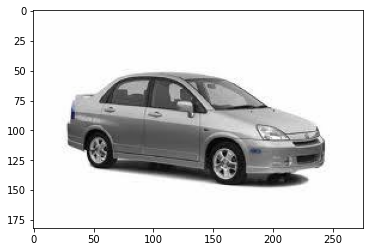

In [270]:
test_path=car_test_image_details.iloc[0,:]['imagePath']
test_image = cv2.imread(test_path)
plt.imshow(test_image)

In [271]:
test_image = cv2.resize(test_image, (256,256))
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_prediction = classification_model.predict(test_image_batch)
test_image_prediction

array([[1.2779597e-03, 1.2676005e-03, 2.1965193e-06, 1.1230119e-03,
        1.5071580e-04, 1.0937335e-04, 5.0878287e-03, 3.1894483e-04,
        7.7284680e-04, 3.6158666e-03, 8.6485717e-04, 1.1032572e-02,
        3.3310011e-02, 2.3274003e-02, 1.5984173e-04, 1.8023813e-04,
        3.0008014e-02, 1.7210083e-05, 1.4729383e-05, 2.1756144e-04,
        8.1819494e-04, 2.2711148e-04, 8.1172941e-04, 2.0693738e-05,
        1.2514458e-02, 1.2631192e-05, 5.0312001e-04, 1.5530260e-05,
        3.2503270e-03, 2.0493614e-03, 4.9151331e-03, 3.7755779e-06,
        6.4883282e-04, 2.3743766e-04, 9.5265978e-06, 1.3939065e-03,
        2.6780416e-03, 3.0689174e-04, 3.3540244e-05, 2.1045865e-04,
        1.7572257e-03, 2.3340879e-04, 6.5650762e-05, 2.1548498e-04,
        2.2343316e-03, 1.4816655e-04, 1.0772981e-03, 4.4044663e-04,
        3.9031831e-05, 3.3770760e-07, 1.8840507e-04, 4.3658014e-02,
        1.4143801e-04, 4.9988870e-03, 2.0048693e-04, 1.4442708e-03,
        3.9919214e-03, 4.5615470e-05, 1.1948322e

In [273]:
np.argmax(test_image_prediction)

108

In [275]:
car_test_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Test Images/Suzuki Aerio Se...   
1     00002.jpg  Dataset/Car Images/Test Images/Ferrari 458 Ita...   
2     00003.jpg  Dataset/Car Images/Test Images/Jeep Patriot SU...   
3     00004.jpg  Dataset/Car Images/Test Images/Toyota Camry Se...   
4     00005.jpg  Dataset/Car Images/Test Images/Tesla Model S S...   
...         ...                                                ...   
8036  08037.jpg  Dataset/Car Images/Test Images/Chevrolet Sonic...   
8037  08038.jpg  Dataset/Car Images/Test Images/Audi V8 Sedan 1...   
8038  08039.jpg  Dataset/Car Images/Test Images/Audi 100 Sedan ...   
8039  08040.jpg  Dataset/Car Images/Test Images/BMW Z4 Converti...   
8040  08041.jpg  Dataset/Car Images/Test Images/BMW X5 SUV 2007...   

                                    class  height  width   X1   Y1    X2   Y2  \
0                 Suzuki Aerio Sedan 2007     182    276   30   52   246  147   
1     Ferrari 458 Italia Convertible 2012     360    640  100   19   576  203   
2                   Jeep Patriot SUV 2012     741   1024   51  105   968  659   
3                 Toyota Camry Sedan 2012     480    640   67   84   581  407   
4                Tesla Model S Sedan 2012     373    600  140  151   593  339   
...                                   ...     ...    ...  ...  ...   ...  ...   
8036           Chevrolet Sonic Sedan 2012     800   1200   49   57  1169  669   
8037                   Audi V8 Sedan 1994     480    640   23   18   640  459   
8038                  Audi 100 Sedan 1994     303    635   33   27   602  252   
8039              BMW Z4 Convertible 2012     427    640   33  142   521  376   
8040                      BMW X5 SUV 2007     426    640   77   73   506  380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 10 columns]

Here we can see that image class is coming as 108, but actual one is 181. Let us try with some more test images

In [282]:
def predict_image_class(test_path):
    image = cv2.imread(test_path)
    image = cv2.resize(image, (256,256))
    test_image_batch = np.expand_dims(image, axis=0)
    test_image_prediction = classification_model.predict(test_image_batch)
    return np.argmax(test_image_prediction)

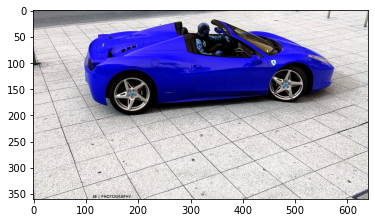

In [283]:
test_path=car_test_image_details.iloc[1,:]['imagePath']
test_image = cv2.imread(test_path)
plt.imshow(test_image)

In [284]:
predict_image_class(test_path)

141

In [285]:
car_test_image_details['Predicted_Image_class']= car_test_image_details['imagePath'].apply(lambda x:predict_image_class(x))

In [288]:
car_test_image_details

Image Name                                          imagePath  \
0     00001.jpg  Dataset/Car Images/Test Images/Suzuki Aerio Se...   
1     00002.jpg  Dataset/Car Images/Test Images/Ferrari 458 Ita...   
2     00003.jpg  Dataset/Car Images/Test Images/Jeep Patriot SU...   
3     00004.jpg  Dataset/Car Images/Test Images/Toyota Camry Se...   
4     00005.jpg  Dataset/Car Images/Test Images/Tesla Model S S...   
...         ...                                                ...   
8036  08037.jpg  Dataset/Car Images/Test Images/Chevrolet Sonic...   
8037  08038.jpg  Dataset/Car Images/Test Images/Audi V8 Sedan 1...   
8038  08039.jpg  Dataset/Car Images/Test Images/Audi 100 Sedan ...   
8039  08040.jpg  Dataset/Car Images/Test Images/BMW Z4 Converti...   
8040  08041.jpg  Dataset/Car Images/Test Images/BMW X5 SUV 2007...   

                                    class  height  width   X1   Y1    X2   Y2  \
0                 Suzuki Aerio Sedan 2007     182    276   30   52   246  147   
1     Ferrari 458 Italia Convertible 2012     360    640  100   19   576  203   
2                   Jeep Patriot SUV 2012     741   1024   51  105   968  659   
3                 Toyota Camry Sedan 2012     480    640   67   84   581  407   
4                Tesla Model S Sedan 2012     373    600  140  151   593  339   
...                                   ...     ...    ...  ...  ...   ...  ...   
8036           Chevrolet Sonic Sedan 2012     800   1200   49   57  1169  669   
8037                   Audi V8 Sedan 1994     480    640   23   18   640  459   
8038                  Audi 100 Sedan 1994     303    635   33   27   602  252   
8039              BMW Z4 Convertible 2012     427    640   33  142   521  376   
8040                      BMW X5 SUV 2007     426    640   77   73   506  380   

      Image class  Predicted_Image_class  
0             181                    108  
1             103                    141  
2             145                     68  
3             187                    152  
4             185                    150  
...           ...                    ...  
8036           63                     41  
8037           16                     92  
8038           17                     69  
8039           38                     20  
8040           32                    187  

[8041 rows x 11 columns]

In [289]:
car_test_image_details.iloc[11,:]

Image Name                                                       00012.jpg
imagePath                Dataset/Car Images/Test Images/Ford Freestar M...
class                                           Ford Freestar Minivan 2007
height                                                                 194
width                                                                  259
X1                                                                      14
Y1                                                                      21
X2                                                                     242
Y2                                                                     156
Image class                                                            108
Predicted_Image_class                                                  108
Name: 11, dtype: object

In [287]:
np.where(car_test_image_details['Image class'] == car_test_image_details['Predicted_Image_class'])

(array([  11,  395,  530,  536,  554,  769, 1108, 1389, 1641, 1780, 1946,
        2001, 2005, 2071, 2251, 2318, 2351, 2482, 2504, 3098, 3140, 3141,
        3203, 3222, 3286, 3461, 3595, 3679, 3773, 3825, 3833, 4135, 4156,
        4199, 4221, 4222, 4256, 4291, 4307, 4467, 4629, 4633, 4935, 5078,
        5262, 5335, 5345, 5401, 5483, 5598, 5644, 5882, 6090, 6103, 6112,
        6151, 6201, 6248, 6296, 6353, 6381, 6383, 6450, 6561, 6582, 6678,
        6736, 6751, 6812, 6828, 7284, 7331, 7391, 7509, 7672, 7705, 7710,
        7725, 7726, 7921]),)

We can see that only above rows got predicted correctly. This CNN model is not performing accuratly. We will try with another model now.

In [ ]:
def define_model(width, height):
    model_input = Input(shape=(width, height, 3), name='image_input')
    model_main = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(model_input)
    model_dense1 = Flatten()(model_main)
    model_dense2 = Dense(256, activation='relu')(model_dense1)
    #model_out = Dense(196, activation="softmax")(model_dense2)
    #Classification
    class_output = Dense(len(num_classes), activation='softmax',name='class')
    #Regression
    reg_output = Dense(4,activation='sigmoid',name='reg')

    #with classification and regression
    model_out = [class_output,reg_output]

    model = Model(model_input,  model_out)
    optimizer = Adam(lr=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [259]:
train_generator = build_train_data(car_train_image_details, batch_size=batch_size)

In [260]:
train_generator

(array([[[[0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          ...,
          [0.77254902, 0.77254902, 0.77254902],
          [0.77647059, 0.77647059, 0.77647059],
          [0.77647059, 0.77647059, 0.77647059]],
 
         [[0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          ...,
          [0.77254902, 0.77254902, 0.77254902],
          [0.77647059, 0.77647059, 0.77647059],
          [0.77647059, 0.77647059, 0.77647059]],
 
         [[0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          [0.42745098, 0.42745098, 0.42745098],
          ...,
          [0.77254902, 0.77254902, 0.77254902],
          [0.77647059, 0.77647059, 0.77647059],
          [0.77647059, 0.77647059, 0.77647059]],
 
         ...,
 
         [[0.83921569, 0.83921569, 0.83921569],
          [0.83921

In [261]:
test_generator = build_train_data(car_test_image_details, batch_size=batch_size)

In [262]:
test_generator

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [279]:
# inception_model_2 = define_model(width, height)
# inception_model.summary()
# save_callback = define_callbacks()

In [251]:
train_generator = data_generator(train, batch_size=batchsize)
train = data_generator(car_train_image_details, batch_size=batch_size)
train

<generator object data_generator at 0x7fa6772be5f0>